In [432]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

# Note: I will predict without the Hands column , because with the hands column the alone for shure will be 100% because there is only 1 hand.

### Loading the data

In [433]:
EvyatarSpontan = pd.read_csv(r"C:\Users\Daniel\Gabi\Evyatar636771052727603804Spontan.csv")
EvyatarSync = pd.read_csv(r"C:\Users\Daniel\Gabi\Evyatar636771053639929594Sync.csv")
EvyatarAlone = pd.read_csv(r"C:\Users\Daniel\Gabi\Evyatar636771054555711409Alone.csv")

NofarSpontan = pd.read_csv(r"C:\Users\Daniel\Gabi\Nofar636759795182793299Spontan.csv")
NofarSync = pd.read_csv(r"C:\Users\Daniel\Gabi\Nofar636759797397919664Sync.csv")
NofarAlone = pd.read_csv(r"C:\Users\Daniel\Gabi\Nofar636759796290435160Alone.csv")

OriyaSpontan = pd.read_csv(r"C:\Users\Daniel\Gabi\Oriya636759804404113837Spontan.csv")
OriyaSync = pd.read_csv(r"C:\Users\Daniel\Gabi\Oriya636759806131350399Sync.csv")
OriyaAlone = pd.read_csv(r"C:\Users\Daniel\Gabi\Oriya636759805268396661Alone.csv")

OryaSpontan = pd.read_csv(r"C:\Users\Daniel\Gabi\OryaB636771083605535985Spontan.csv")
OryaSync = pd.read_csv(r"C:\Users\Daniel\Gabi\OryaB636771084494502229Sync.csv")
OryaAlone = pd.read_csv(r"C:\Users\Daniel\Gabi\OryaB636771082736601528Alone.csv")

RevitalSpontan = pd.read_csv(r"C:\Users\Daniel\Gabi\Revital636770957038873193Spontan.csv")
RevitalSync = pd.read_csv(r"C:\Users\Daniel\Gabi\Revital636770957894370062Sync.csv")
RevitalAlone = pd.read_csv(r"C:\Users\Daniel\Gabi\Revital636770955999435879Alone.csv")

ShaharSpontan = pd.read_csv(r"C:\Users\Daniel\Gabi\Sachar636771045591258071Spontan.csv")
ShaharSync = pd.read_csv(r"C:\Users\Daniel\Gabi\Sachar636771046527112972Sync.csv")
ShaharAlone = pd.read_csv(r"C:\Users\Daniel\Gabi\Sachar636771047408504303Alone.csv")

ShellySpontan = pd.read_csv(r"C:\Users\Daniel\Gabi\Shelly636759787508979097Spontan.csv")
ShellySync = pd.read_csv(r"C:\Users\Daniel\Gabi\Shelly636759789526313406Sync.csv")
ShellyAlone = pd.read_csv(r"C:\Users\Daniel\Gabi\Shelly636759788383205274Alone.csv")
                        

YaelSpontan = pd.read_csv(r"C:\Users\Daniel\Gabi\Yael636771059544754823Spontan.csv")
YaelSync = pd.read_csv(r"C:\Users\Daniel\Gabi\Yael636771060699529085Sync.csv")
YaelAlone = pd.read_csv(r"C:\Users\Daniel\Gabi\Yael636771061659067649Alone.csv")

YoelSpontan = pd.read_csv(r"C:\Users\Daniel\Gabi\Yoel636760921663075813Spontan.csv")
YoelSync = pd.read_csv(r"C:\Users\Daniel\Gabi\Yoel636760923490742912Sync.csv")
YoelAlone = pd.read_csv(r"C:\Users\Daniel\Gabi\Yoel636760922573364655Alone.csv")

RightHand=pd.read_csv(r"C:\Users\Daniel\Gabi\HandRight.csv")


In [434]:
LitielSpontan = pd.read_csv(r"C:\Users\Daniel\Gabi\Itiel636770940701219076Spontan.csv")
LitielSync = pd.read_csv(r"C:\Users\Daniel\Gabi\Itiel636770941638547912Sync.csv")
LitielAlone = pd.read_csv(r"C:\Users\Daniel\Gabi\Itiel636770942529041679Alone.csv")

MorSpontan = pd.read_csv(r"C:\Users\Daniel\Gabi\Mor636771064635567065Spontan.csv")
MorSync = pd.read_csv(r"C:\Users\Daniel\Gabi\Mor636771065531910215Sync.csv")
MorAlone = pd.read_csv(r"C:\Users\Daniel\Gabi\Mor636771066407626524Alone.csv")

OdedSpontan = pd.read_csv(r"C:\Users\Daniel\Gabi\Oded636754670490266956Spontan.csv")
OdedSync = pd.read_csv(r"C:\Users\Daniel\Gabi\Oded636754671560850581Sync.csv")
OdedAlone = pd.read_csv(r"C:\Users\Daniel\Gabi\Oded636754669540564461Alone.csv")

## Creating lists to work on the data , i am taking one person for the test , only at the end i will check my testVal on the final model

In [435]:
AloneTrain=[EvyatarAlone,NofarAlone,OriyaAlone,RevitalAlone,ShaharAlone,ShellyAlone,YaelAlone,YoelAlone]
SpontanTrain=[EvyatarSpontan,NofarSpontan,OriyaSpontan,RevitalSpontan,ShaharSpontan,ShellySpontan,YaelSpontan,YoelSpontan]
SyncTrain=[EvyatarSync,NofarSync,OriyaSync,RevitalSync,ShaharSync,ShellySync,YaelSync,YoelSync]

AloneTest = [OryaAlone]
SpontanTest=[OryaSpontan]
SyncTest= [OryaSync]

AloneTestVal=[MorAlone,OdedAlone,LitielAlone]
SpontanTestVal=[LitielSpontan,MorSpontan,OdedSpontan]
SyncTestVal=[OdedSync,LitielSync,MorSync]

### Droping the null values

In [436]:
for t in AloneTrain:
    if (t.isnull().sum().sum()!=0):
        t.dropena(inplace=True)

for t in SpontanTrain:
    if (t.isnull().sum().sum()!=0):
        t.dropena(inplace=True)
        
for t in SpontanTest:
    if (t.isnull().sum().sum()!=0):
        t.dropena(inplace=True)
        
for t in AloneTest:
    if (t.isnull().sum().sum()!=0):
        t.dropena(inplace=True)

for t in SyncTest:
    if (t.isnull().sum().sum()!=0):
        t.dropena(inplace=True)

for t in SyncTrain:
    if (t.isnull().sum().sum()!=0):
        t.dropena(inplace=True)       
        
        
for t in AloneTestVal:
    if (t.isnull().sum().sum()!=0):
        t.dropena(inplace=True)

for t in SyncTestVal:
    if (t.isnull().sum().sum()!=0):
        t.dropena(inplace=True)

for t in SyncTestVal:
    if (t.isnull().sum().sum()!=0):
        t.dropena(inplace=True)
        
if(RightHand.isnull().sum().sum()!=0):
    RightHand.dropna(inplace=True)

### Showing there are no null in the Train data

In [437]:
counter = 0
for t in AloneTrain:
    if (t.isnull().sum().sum()!=0):
        counter=counter+1
if(counter != 0):
    print('There are NaN values in AloneTrain')
else:
    print('There are no NaN values in AloneTrain')
    
counter = 0
for t in SpontanTrain:
    if (t.isnull().sum().sum()!=0):
        counter=counter+1
if(counter != 0):
    print('There are NaN values in SpontanTrain')
else:
    print('There are no NaN values in SpontanTrain')
    
counter = 0
for t in SyncTrain:
    if (t.isnull().sum().sum()!=0):
        counter=counter+1
if(counter != 0):
    print('There are NaN values in SyncTrain')
else:
    print('There are no NaN values in SyncTrain')

There are no NaN values in AloneTrain
There are no NaN values in SpontanTrain
There are no NaN values in SyncTrain


### Showing there is no null in the Test data

In [438]:
counter = 0
for t in AloneTest:
    if (t.isnull().sum().sum()!=0):
        counter=counter+1
if(counter != 0):
    print('There are NaN values in AloneTest')
else:
    print('There are no NaN values in AloneTest')

counter = 0
for t in SpontanTest:
    if (t.isnull().sum().sum()!=0):
        counter=counter+1
if(counter != 0):
    print('There are NaN values in SpontanTest')
else:
    print('There are no NaN values in SpontanTest')

counter = 0
for t in SyncTest:
    if (t.isnull().sum().sum()!=0):
        counter=counter+1
if(counter != 0):
    print('There are NaN values in SyncTest')
else:
    print('There are no NaN values in SyncTest')

There are no NaN values in AloneTest
There are no NaN values in SpontanTest
There are no NaN values in SyncTest


### Showing there are no null vakues in the TestVal

In [439]:
counter = 0
for t in AloneTestVal:
    if (t.isnull().sum().sum()!=0):
        counter=counter+1
if(counter != 0):
    print('There are NaN values in AloneTestVal')
else:
    print('There are no NaN values in AloneTestVal')

counter = 0
for t in SpontanTestVal:
    if (t.isnull().sum().sum()!=0):
        counter=counter+1
if(counter != 0):
    print('There are NaN values in SpontanTestVal')
else:
    print('There are no NaN values in SpontanTestVal')

counter = 0
for t in SyncTestVal:
    if (t.isnull().sum().sum()!=0):
        counter=counter+1
if(counter != 0):
    print('There are NaN values in SyncTestVal')
else:
    print('There are no NaN values in SyncTestVal')

There are no NaN values in AloneTestVal
There are no NaN values in SpontanTestVal
There are no NaN values in SyncTestVal


### Showing there is no null in the RughtHand data

In [440]:
RightHand.isnull().sum()

Time               0
 Frame ID          0
 Hand Type         0
 # hands           0
 Position X        0
 Position Y        0
 Position Z        0
 Velocity X        0
 Velocity Y        0
 Velocity Z        0
 Pitch             0
 Roll              0
 Yaw               0
 Wrist Pos X       0
 Wrist Pos Y       0
 Wrist Pos Z       0
 Elbow pos X       0
 Elbow Pos Y       0
 Elbow Pos Z       0
 Grab Strenth      0
 Grab Angle        0
 Pinch Strength    0
dtype: int64

### Cleaning the data, we are checking that the values are match:

#### For the right hand we will make sure that the hands column is 1 and the Hand Type is right 

In [441]:
RightHand

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.671670,226.2064,20.26470,34.266650,-195.214700,-35.043020,...,-0.277800,46.888310,207.35480,86.23589,203.83370,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.241190,222.9389,20.11781,36.164430,-180.093900,-4.052799,...,-0.277763,47.548610,205.65680,86.42250,203.95530,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.724610,220.9709,19.94972,26.352980,-95.088190,-11.157620,...,-0.278792,48.150300,204.51820,86.35149,204.62310,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.090160,219.7124,19.67679,19.468040,-61.755180,-21.303780,...,-0.279768,48.641750,203.99890,86.16056,204.99390,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.460170,219.3652,19.13128,21.949640,-8.355943,-35.081790,...,-0.278629,48.931350,203.37770,85.59017,204.59520,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,201.7963,23950,left,1,-0.323175,133.7385,101.87010,1.267956,-281.917800,319.237200,...,0.014095,1.693034,105.98620,171.82360,-108.34840,-93.43824,319.8367,0.0,0.133462,0.0
4424,201.8130,23952,left,1,-0.147323,129.7719,106.21060,-9.675756,-231.337500,248.109700,...,0.038956,0.450534,104.88660,177.28050,-104.47600,-95.64841,327.4911,0.0,0.100465,0.0
4425,201.8304,23954,left,1,-0.362086,125.4905,107.51370,0.578270,-205.407100,86.839940,...,0.039169,0.317466,103.76150,179.51640,-98.71099,-100.80110,328.2934,0.0,0.202968,0.0
4426,201.8472,23956,left,1,-0.431924,121.2493,107.08130,-0.375302,-235.595100,-55.290660,...,0.036723,0.433988,101.23320,179.47840,-94.49784,-108.06140,324.2915,0.0,0.261246,0.0


In [442]:
RightHand[' Hand Type'].value_counts()

right    4354
left       74
Name:  Hand Type, dtype: int64

In [443]:
RightHand[' Hand Type'] = "right"

### Making sure that on the all right hand the hands is 1 

In [444]:
RightHand[' # hands'] = 1
RightHand[' # hands'].value_counts()

1    4428
Name:  # hands, dtype: int64

### For the Alone we will drop with "right" hand type and we will  check that the hands column is 1

In [445]:
# droping right hands type in alone
for alone in AloneTrain:
        alone.drop(alone[alone[' Hand Type'] == "right"].index,inplace=True)
for alone in AloneTest:
        alone.drop(alone[alone[' Hand Type'] == "right"].index,inplace=True)
for alone in AloneTestVal:
        alone.drop(alone[alone[' Hand Type'] == "right"].index,inplace=True)

In [446]:
NofarAlone[' Hand Type'].value_counts()

left    4527
Name:  Hand Type, dtype: int64

In [447]:
# mmaking sure hands type in alone
for alone in AloneTrain:
        alone[' # hands'] = 1

for alone in AloneTest:
        alone[' # hands'] = 1

for alone in AloneTestVal:
        alone[' # hands'] = 1

### For the Sync and Spontan we will make sure that the hands are 2 , that there are 2 values for every "Frame ID"

#### 2 exampels before the droping:

In [448]:
SpontanTrain[3].groupby([' Frame ID']).count()['Time'].value_counts()

2    4297
1     228
4       1
Name: Time, dtype: int64

In [449]:
YaelSpontan.groupby([' Frame ID']).count()['Time'].value_counts()

2    4246
1     281
Name: Time, dtype: int64

### Droping for Train , Test , TestVal :

In [450]:
for set in range(len(SpontanTrain)):
    for i in ((SpontanTrain[set].groupby([' Frame ID']).count()['Time'] != 2)[(SpontanTrain[set].groupby([' Frame ID']).count()['Time'] != 2) == True]).index:
        SpontanTrain[set].drop(SpontanTrain[set][SpontanTrain[set][' Frame ID']==i].index, inplace=True)

In [451]:
for set in range(len(SyncTrain)):
    for i in ((SyncTrain[set].groupby([' Frame ID']).count()['Time'] != 2)[(SyncTrain[set].groupby([' Frame ID']).count()['Time'] != 2) == True]).index:
        SyncTrain[set].drop(SyncTrain[set][SyncTrain[set][' Frame ID']==i].index, inplace=True)

In [452]:
for set in range(len(SpontanTest)):
    for i in ((SpontanTest[set].groupby([' Frame ID']).count()['Time'] != 2)[(SpontanTest[set].groupby([' Frame ID']).count()['Time'] != 2) == True]).index:
        SpontanTest[set].drop(SpontanTest[set][SpontanTest[set][' Frame ID']==i].index, inplace=True)

In [453]:
for set in range(len(SyncTest)):
    for i in ((SyncTest[set].groupby([' Frame ID']).count()['Time'] != 2)[(SyncTest[set].groupby([' Frame ID']).count()['Time'] != 2) == True]).index:
        SyncTest[set].drop(SyncTest[set][SyncTest[set][' Frame ID']==i].index, inplace=True)

In [454]:
for set in range(len(SpontanTestVal)):
    for i in ((SpontanTestVal[set].groupby([' Frame ID']).count()['Time'] != 2)[(SpontanTestVal[set].groupby([' Frame ID']).count()['Time'] != 2) == True]).index:
        SpontanTestVal[set].drop(SpontanTestVal[set][SpontanTestVal[set][' Frame ID']==i].index, inplace=True)

In [455]:
for set in range(len(SyncTestVal)):
    for i in ((SyncTestVal[set].groupby([' Frame ID']).count()['Time'] != 2)[(SyncTestVal[set].groupby([' Frame ID']).count()['Time'] != 2) == True]).index:
        SyncTestVal[set].drop(SyncTestVal[set][SyncTestVal[set][' Frame ID']==i].index, inplace=True)

#### The 2 exampels after the droping :

In [456]:
SpontanTrain[3].groupby([' Frame ID']).count()['Time'].value_counts()

2    4297
Name: Time, dtype: int64

In [457]:
YaelSpontan.groupby([' Frame ID']).count()['Time'].value_counts()

2    4246
Name: Time, dtype: int64

### Droping all the rows that says that Sync or Spontan has one hand(if there are):

In [458]:
for bouth in SpontanTrain:
        bouth.drop(bouth[bouth[' # hands'] == 1].index,inplace=True)

for bouth in SpontanTest:
        bouth.drop(bouth[bouth[' # hands'] == 1].index,inplace=True)

for bouth in SpontanTestVal:
        bouth.drop(bouth[bouth[' # hands'] == 1].index,inplace=True)

In [459]:
for bouth in SyncTrain:
        bouth.drop(bouth[bouth[' # hands'] == 1].index,inplace=True)

for bouth in SyncTest:
        bouth.drop(bouth[bouth[' # hands'] == 1].index,inplace=True)

for bouth in SyncTestVal:
        bouth.drop(bouth[bouth[' # hands'] == 1].index,inplace=True)

#### Removing the first 7 seconds before merging the fiels, because at the first 7 seconds people needs to understand how does it work 

In [460]:
#for all the train
for i in range(len(AloneTrain)):
    AloneTrain[i] = AloneTrain[i].loc[AloneTrain[i]['Time'] > AloneTrain[i]['Time'].iloc[0]+7]
for i in range(len(SpontanTrain)):
    SpontanTrain[i] = SpontanTrain[i].loc[SpontanTrain[i]['Time'] > SpontanTrain[i]['Time'].iloc[0]+7]
    
for i in range(len(SyncTrain)):
    SyncTrain[i] = SyncTrain[i].loc[SyncTrain[i]['Time'] > SyncTrain[i]['Time'].iloc[0]+7]

In [461]:
#for all the test
for i in range(len(AloneTest)):
    AloneTest[i] = AloneTest[i].loc[AloneTest[i]['Time'] > AloneTest[i]['Time'].iloc[0]+7]

for i in range(len(SpontanTest)):
    SpontanTest[i] = SpontanTest[i].loc[SpontanTest[i]['Time'] > SpontanTest[i]['Time'].iloc[0]+7]

for i in range(len(SyncTest)):
    SyncTest[i] = SyncTest[i].loc[SyncTest[i]['Time'] > SyncTest[i]['Time'].iloc[0]+7]

In [462]:
#for all the testVal
for i in range(len(AloneTestVal)):
    AloneTestVal[i] = AloneTestVal[i].loc[AloneTestVal[i]['Time'] > AloneTestVal[i]['Time'].iloc[0]+7]

for i in range(len(SpontanTestVal)):
    SpontanTestVal[i] = SpontanTestVal[i].loc[SpontanTestVal[i]['Time'] > SpontanTestVal[i]['Time'].iloc[0]+7]

for i in range(len(SyncTestVal)):
    SyncTestVal[i] = SyncTestVal[i].loc[SyncTestVal[i]['Time'] > SyncTestVal[i]['Time'].iloc[0]+7]

In [463]:
#for the right hand
RightHand = RightHand.loc[RightHand['Time'] > RightHand['Time'].iloc[0]+7]

In [464]:
RightHand # you can see that it starts from 135.3 while above you can see that it starts from 128.28 (+7 seconds) 

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
421,135.3024,16287,right,1,11.930320,199.9861,4.981665,-35.512210,-165.3466,-57.68153,...,-0.906612,75.457400,206.05210,45.38764,284.39460,140.01670,201.9318,0.0,0.561324,0.0
422,135.3194,16289,right,1,11.191900,195.3075,3.661716,-43.587440,-309.8374,-77.18515,...,-0.904311,74.461410,202.45620,44.28679,282.62780,140.97120,203.6773,0.0,0.626321,0.0
423,135.3357,16291,right,1,10.533080,189.0297,2.829388,-30.403600,-363.0033,-43.79815,...,-0.901862,73.600600,197.43870,43.54082,280.63840,142.54010,206.7526,0.0,0.636596,0.0
424,135.3524,16293,right,1,10.243000,181.9816,2.064330,-15.424000,-423.2120,-43.99948,...,-0.901268,73.195370,191.72020,42.73155,279.73570,148.13820,209.9330,0.0,0.701644,0.0
425,135.3690,16295,right,1,10.020610,174.8592,1.228467,-8.733602,-413.4513,-53.88054,...,-0.897777,72.686710,186.16130,41.98006,278.68900,152.52150,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,201.7963,23950,right,1,-0.323175,133.7385,101.870100,1.267956,-281.9178,319.23720,...,0.014095,1.693034,105.98620,171.82360,-108.34840,-93.43824,319.8367,0.0,0.133462,0.0
4424,201.8130,23952,right,1,-0.147323,129.7719,106.210600,-9.675756,-231.3375,248.10970,...,0.038956,0.450534,104.88660,177.28050,-104.47600,-95.64841,327.4911,0.0,0.100465,0.0
4425,201.8304,23954,right,1,-0.362086,125.4905,107.513700,0.578270,-205.4071,86.83994,...,0.039169,0.317466,103.76150,179.51640,-98.71099,-100.80110,328.2934,0.0,0.202968,0.0
4426,201.8472,23956,right,1,-0.431924,121.2493,107.081300,-0.375302,-235.5951,-55.29066,...,0.036723,0.433988,101.23320,179.47840,-94.49784,-108.06140,324.2915,0.0,0.261246,0.0


### Making one data frame for AloneTrain together with HandRight they need to be at the same size 

In [465]:
RightHandbig = RightHand
for i in range(len(AloneTrain)):
    AloneTrain[i] = AloneTrain[i].reset_index() 
    AloneTrain[i] = AloneTrain[i].drop(['index'], axis = 1)
    
    RightHandbig  = RightHand
    while (len(RightHandbig) < len(AloneTrain[i])): 
        RightHandbig = pd.concat([RightHandbig, RightHand], ignore_index = True)
    numToDrop = len(RightHandbig) - len(AloneTrain[i]) 
    
    RightHandbig.drop(RightHandbig.tail(numToDrop).index, inplace = True)
    RightHandbig = RightHandbig.reset_index() 
    RightHandbig = RightHandbig.drop(['index'], axis = 1)
    
    AloneTrain[i] = pd.concat([RightHandbig, AloneTrain[i]]).sort_index(kind='merge') 
    AloneTrain[i] = AloneTrain[i].reset_index() 
    AloneTrain[i] = AloneTrain[i].drop(['index'], axis = 1)

C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Making one data frame for AloneTest together with HandRight they need to be at the same size 

In [466]:
RightHandbig = RightHand
for i in range(len(AloneTest)):
    AloneTest[i] = AloneTest[i].reset_index() 
    AloneTest[i] = AloneTest[i].drop(['index'], axis = 1)
    
    RightHandbig  = RightHand
    while (len(RightHandbig) < len(AloneTest[i])): 
        RightHandbig = pd.concat([RightHandbig, RightHand], ignore_index = True)
    numToDrop = len(RightHandbig) - len(AloneTest[i]) 
    
    RightHandbig.drop(RightHandbig.tail(numToDrop).index, inplace = True)
    RightHandbig = RightHandbig.reset_index() 
    RightHandbig = RightHandbig.drop(['index'], axis = 1)
    
    AloneTest[i] = pd.concat([RightHandbig, AloneTest[i]]).sort_index(kind='merge')
    AloneTest[i] = AloneTest[i].reset_index() 
    AloneTest[i] = AloneTest[i].drop(['index'], axis = 1)

### Making one data frame for AloneTestVal together with HandRight they need to be at the same size

In [467]:
RightHandbig = RightHand
for i in range(len(AloneTestVal)):
    AloneTestVal[i] = AloneTestVal[i].reset_index() 
    AloneTestVal[i] = AloneTestVal[i].drop(['index'], axis = 1)
    
    RightHandbig  = RightHand
    while (len(RightHandbig) < len(AloneTestVal[i])): 
        RightHandbig = pd.concat([RightHandbig, RightHand], ignore_index = True)
    numToDrop = len(RightHandbig) - len(AloneTestVal[i]) 
    
    RightHandbig.drop(RightHandbig.tail(numToDrop).index, inplace = True)
    RightHandbig = RightHandbig.reset_index() 
    RightHandbig = RightHandbig.drop(['index'], axis = 1)
    
    AloneTestVal[i] = pd.concat([RightHandbig, AloneTestVal[i]]).sort_index(kind='merge')
    AloneTestVal[i] = AloneTestVal[i].reset_index() 
    AloneTestVal[i] = AloneTestVal[i].drop(['index'], axis = 1)

## Showing exampel for alon dataframe:

In [468]:
AloneTrain[1]

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,135.3024,16287,right,1,11.930320,199.9861,4.981665,-35.51221,-165.346600,-57.68153,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.01670,201.93180,0.0,0.561324,0.000000
1,503.0748,58994,left,1,-25.099750,255.7507,45.231880,143.85800,-607.579700,-139.43540,...,1.740217,-88.67735,226.0782,26.63538,-305.1488,102.22980,-36.52119,0.0,1.694959,0.221438
2,135.3194,16289,right,1,11.191900,195.3075,3.661716,-43.58744,-309.837400,-77.18515,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.97120,203.67730,0.0,0.626321,0.000000
3,503.0913,58996,left,1,-20.866620,247.3505,43.291460,245.54970,-447.327100,-120.79570,...,1.764604,-83.18510,215.6640,23.81408,-303.0901,93.46584,-30.00530,0.0,1.614523,0.118337
4,135.3357,16291,right,1,10.533080,189.0297,2.829388,-30.40360,-363.003300,-43.79815,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.54010,206.75260,0.0,0.636596,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,571.0153,66823,left,1,4.002736,209.5644,35.278740,-96.84993,268.981800,91.01165,...,1.715851,-62.40871,215.9923,16.88885,-282.1674,115.97470,-38.89357,0.0,0.520228,0.000000
8204,136.8851,16470,right,1,13.953670,149.4147,30.350550,-11.62041,-314.039300,88.68116,...,-0.679887,67.28197,158.2056,83.53933,240.9223,136.79480,288.47810,0.0,0.536097,0.000000
8205,571.0312,66825,left,1,2.313775,214.1817,36.739260,-115.52820,225.913400,73.01247,...,1.734598,-62.63747,226.5946,17.18937,-280.5200,125.67150,-44.09025,0.0,0.762050,0.000000
8206,136.9019,16472,right,1,13.700100,143.3449,31.750950,-14.17414,-359.516700,83.72819,...,-0.668800,66.57967,152.1623,85.48486,242.3339,141.53750,289.47550,0.0,0.573421,0.000000


## I will creat data frame sorted by "HandType" for each data frame , with that i will check better the correlation for each "Frame ID".

#### For the train:

In [469]:
counter = 0
for alon in range(len(AloneTrain)):
    alontmp1 = AloneTrain[counter][AloneTrain[counter][' Hand Type'] == 'left'].reset_index()
    alontmp2 = AloneTrain[counter][AloneTrain[counter][' Hand Type'] == 'right'].reset_index()
    AloneTrain[counter] = alontmp1.join(alontmp2,rsuffix='_other')
    AloneTrain[counter].drop(['index', 'index_other'], axis = 1 , inplace = True)
    counter = counter+1
    
counter = 0
for spontan in range(len(SpontanTrain)):
    alontmp1 = SpontanTrain[counter][SpontanTrain[counter][' Hand Type'] == 'left'].reset_index()
    alontmp2 = SpontanTrain[counter][SpontanTrain[counter][' Hand Type'] == 'right'].reset_index()
    SpontanTrain[counter] = alontmp1.join(alontmp2,rsuffix='_other')
    SpontanTrain[counter].drop(['index', 'index_other'], axis = 1 , inplace = True)
    counter = counter+1

counter = 0
for sync in range(len(SyncTrain)):
    alontmp1 = SyncTrain[counter][SyncTrain[counter][' Hand Type'] == 'left'].reset_index()
    alontmp2 = SyncTrain[counter][SyncTrain[counter][' Hand Type'] == 'right'].reset_index()
    SyncTrain[counter] = alontmp1.join(alontmp2,rsuffix='_other')
    SyncTrain[counter].drop(['index', 'index_other'], axis = 1 , inplace = True)
    counter = counter+1

#### For the test:

In [470]:
counter = 0
for alon in range(len(AloneTest)):
    alontmp1 = AloneTest[counter][AloneTest[counter][' Hand Type'] == 'left'].reset_index()
    alontmp2 = AloneTest[counter][AloneTest[counter][' Hand Type'] == 'right'].reset_index()
    AloneTest[counter] = alontmp1.join(alontmp2,rsuffix='_other')
    AloneTest[counter].drop(['index', 'index_other'], axis = 1 , inplace = True)
    counter = counter+1

counter = 0
for spontan in range(len(SpontanTest)):
    alontmp1 = SpontanTest[counter][SpontanTest[counter][' Hand Type'] == 'left'].reset_index()
    alontmp2 = SpontanTest[counter][SpontanTest[counter][' Hand Type'] == 'right'].reset_index()
    SpontanTest[counter] = alontmp1.join(alontmp2,rsuffix='_other')
    SpontanTest[counter].drop(['index', 'index_other'], axis = 1 , inplace = True)
    counter = counter+1

counter = 0
for sync in range(len(SyncTest)):
    alontmp1 = SyncTest[counter][SyncTest[counter][' Hand Type'] == 'left'].reset_index()
    alontmp2 = SyncTest[counter][SyncTest[counter][' Hand Type'] == 'right'].reset_index()
    SyncTest[counter] = alontmp1.join(alontmp2,rsuffix='_other')
    SyncTest[counter].drop(['index', 'index_other'], axis = 1 , inplace = True)
    counter = counter+1

#### For the testVal:

In [471]:
counter = 0
for alon in range(len(AloneTestVal)):
    alontmp1 = AloneTestVal[counter][AloneTestVal[counter][' Hand Type'] == 'left'].reset_index()
    alontmp2 = AloneTestVal[counter][AloneTestVal[counter][' Hand Type'] == 'right'].reset_index()
    AloneTestVal[counter] = alontmp1.join(alontmp2,rsuffix='_other')
    AloneTestVal[counter].drop(['index', 'index_other'], axis = 1 , inplace = True)
    counter = counter+1

counter = 0
for spontan in range(len(SpontanTestVal)):
    alontmp1 = SpontanTestVal[counter][SpontanTestVal[counter][' Hand Type'] == 'left'].reset_index()
    alontmp2 = SpontanTestVal[counter][SpontanTestVal[counter][' Hand Type'] == 'right'].reset_index()
    SpontanTestVal[counter] = alontmp1.join(alontmp2,rsuffix='_other')
    SpontanTestVal[counter].drop(['index', 'index_other'], axis = 1 , inplace = True)
    counter = counter+1

counter = 0
for sync in range(len(SyncTestVal)):
    alontmp1 = SyncTestVal[counter][SyncTestVal[counter][' Hand Type'] == 'left'].reset_index()
    alontmp2 = SyncTestVal[counter][SyncTestVal[counter][' Hand Type'] == 'right'].reset_index()
    SyncTestVal[counter] = alontmp1.join(alontmp2,rsuffix='_other')
    SyncTestVal[counter].drop(['index', 'index_other'], axis = 1 , inplace = True)
    counter = counter+1

### Examples for a dataFrame right now

In [472]:
AloneTrain[0]

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw_other,Wrist Pos X_other,Wrist Pos Y_other,Wrist Pos Z_other,Elbow pos X_other,Elbow Pos Y_other,Elbow Pos Z_other,Grab Strenth_other,Grab Angle_other,Pinch Strength_other
0,525.8185,150428,left,1,-52.96039,184.5535,-2.856696,162.15270,127.60520,-85.83782,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.0167,201.9318,0.0,0.561324,0.0
1,525.8351,150430,left,1,-50.04434,185.5024,-4.845364,102.82480,-24.84337,-79.46504,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.9712,203.6773,0.0,0.626321,0.0
2,525.8516,150432,left,1,-49.07749,182.2930,-6.442950,12.12360,-258.75260,-99.40902,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.5401,206.7526,0.0,0.636596,0.0
3,525.8682,150434,left,1,-50.89614,176.7708,-9.005262,-53.57292,-271.01500,-143.03330,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.1382,209.9330,0.0,0.701644,0.0
4,525.8848,150436,left,1,-51.76074,174.1853,-10.600340,-40.95883,-140.44390,-59.85620,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.5215,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,593.7177,158254,left,1,-44.79453,123.7657,-6.241947,274.44630,106.78920,125.05260,...,-0.702845,67.87458,172.6170,76.80444,247.3050,143.3844,275.6685,0.0,0.463589,0.0
4099,593.7343,158256,left,1,-40.77390,126.7342,-3.452266,223.52940,209.72390,160.24900,...,-0.695191,67.89079,169.6017,78.13200,244.3223,140.6269,279.7040,0.0,0.508077,0.0
4100,593.7509,158257,left,1,-38.56184,127.6858,-2.086977,254.93310,109.66130,157.34590,...,-0.691167,67.93107,166.4908,79.70734,242.3087,136.4678,282.9136,0.0,0.524940,0.0
4101,593.7681,158259,left,1,-35.88303,132.9386,0.526575,185.86870,204.98220,154.04880,...,-0.686824,67.80099,163.0233,81.64207,241.1522,134.7897,285.9885,0.0,0.531801,0.0


In [473]:
SpontanTrain[2]

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw_other,Wrist Pos X_other,Wrist Pos Y_other,Wrist Pos Z_other,Elbow pos X_other,Elbow Pos Y_other,Elbow Pos Z_other,Grab Strenth_other,Grab Angle_other,Pinch Strength_other
0,533.5046,61565,left,2,-144.9599,209.1689,40.20786,322.858000,-279.70120,-81.774230,...,-0.523125,222.7343,203.2148,139.0802,356.5261,-18.75253,166.2997,0.0,0.262750,0.0
1,533.5208,61566,left,2,-141.7673,206.1844,39.40232,369.561100,-345.46190,-93.244370,...,-0.520804,221.6911,201.9233,137.3478,359.0649,-17.55353,166.8265,0.0,0.264580,0.0
2,533.5373,61568,left,2,-136.4450,200.6899,37.77026,251.063900,-280.00300,-81.448760,...,-0.524019,219.7236,199.8438,134.0484,364.0726,-14.82939,165.5033,0.0,0.350542,0.0
3,533.5539,61570,left,2,-134.1485,198.2228,36.83630,99.524030,-121.26490,-45.479760,...,-0.534004,217.7050,196.7920,130.4890,369.1734,-12.87221,162.2517,0.0,0.410346,0.0
4,533.5704,61572,left,2,-133.0703,196.6501,36.33804,54.208050,-91.78717,-21.865100,...,-0.537836,215.0829,193.7584,126.7425,370.7416,-12.81185,158.5191,0.0,0.380644,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,601.4110,69390,left,2,-194.9712,234.5503,63.02927,174.960100,-90.67593,41.962610,...,-0.732129,166.2453,157.4690,187.6370,401.0359,88.77749,272.0875,0.0,0.000000,0.0
4097,601.4275,69392,left,2,-193.0227,233.3362,63.81721,87.045860,-53.38332,47.665220,...,-0.712060,164.8193,158.1572,183.3627,397.8166,93.05466,275.2920,0.0,0.000000,0.0
4098,601.4441,69394,left,2,-192.6768,232.3098,64.65887,-1.263809,-59.25592,40.459460,...,-0.681493,162.6091,159.0138,178.6846,392.0045,91.70057,277.7994,0.0,0.000000,0.0
4099,601.4606,69396,left,2,-192.4230,230.1661,65.07171,35.676960,-138.15910,24.418790,...,-0.653587,160.3231,158.3321,173.3746,387.3632,84.98347,273.6236,0.0,0.008099,0.0


In [474]:
SpontanTrain[0]

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw_other,Wrist Pos X_other,Wrist Pos Y_other,Wrist Pos Z_other,Elbow pos X_other,Elbow Pos Y_other,Elbow Pos Z_other,Grab Strenth_other,Grab Angle_other,Pinch Strength_other
0,343.0061,129364,left,2,-102.28700,198.3166,-2.122641,-174.57210,379.1468,28.479910,...,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.7099,1.000000,2.793122,0.329752
1,343.0227,129365,left,2,-103.87210,201.4944,-2.063620,-178.50250,357.8548,6.646493,...,-0.560823,190.8670,170.1528,9.191355,323.1941,20.16283,161.8589,1.000000,2.704073,0.293775
2,343.0392,129367,left,2,-106.36910,207.4667,-2.337110,-126.78780,318.5284,-12.872290,...,-0.554623,190.4547,169.7302,10.512530,324.1130,19.09524,161.3746,1.000000,2.422549,0.175940
3,343.0558,129369,left,2,-107.95090,212.1324,-2.788956,-74.28078,244.4823,-30.771300,...,-0.548808,190.8024,170.2935,12.170700,323.0928,17.14600,161.7030,1.000000,2.101400,0.052777
4,343.0723,129371,left,2,-109.54270,216.8003,-3.337280,-96.49666,269.5434,-37.723870,...,-0.553877,192.5801,172.1215,12.837430,325.7650,19.51061,162.1241,0.849696,1.878483,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,410.9128,137189,left,2,-95.26167,187.1566,27.775130,-100.01640,259.6626,109.087700,...,-0.060598,172.5064,233.2361,27.744950,298.7240,38.13409,107.8183,0.000000,0.155385,0.000000
4100,410.9301,137191,left,2,-96.44621,190.4206,29.697050,-48.75451,157.4036,119.888000,...,-0.048219,172.8999,230.2340,29.812620,297.6808,39.08725,120.9174,0.000000,0.238977,0.000000
4101,410.9461,137193,left,2,-97.82056,193.5205,31.933430,-85.41756,173.5275,132.656400,...,-0.047516,173.4517,227.2283,32.649970,298.0053,37.92620,127.8263,0.000000,0.315757,0.000000
4102,410.9625,137195,left,2,-99.81297,196.2407,34.418740,-117.87250,134.3801,126.737100,...,-0.041292,172.9846,222.5917,35.086170,300.6257,34.79204,129.1417,0.000000,0.482085,0.000000


## Creating big data frames for each list:

#### For Train:

In [475]:
SpontanDfTrain = pd.concat(SpontanTrain).reset_index()
SpontanDfTrain.drop(['index'], axis = 1 , inplace = True)
AloneDfTrain = pd.concat(AloneTrain).reset_index()
AloneDfTrain.drop(['index'], axis = 1 , inplace = True)
SyncDfTrain = pd.concat(SyncTrain).reset_index()
SyncDfTrain.drop(['index'], axis = 1 , inplace = True)

#### For Test:

In [476]:
SpontanDfTest = pd.concat(SpontanTest).reset_index()
SpontanDfTest.drop(['index'], axis = 1 , inplace = True)
AloneDfTest = pd.concat(AloneTest).reset_index()
AloneDfTest.drop(['index'], axis = 1 , inplace = True)
SyncDfTest = pd.concat(SyncTest).reset_index()
SyncDfTest.drop(['index'], axis = 1 , inplace = True)

#### For TestVal:

In [477]:
SpontanDfTestVal = pd.concat(SpontanTestVal).reset_index()
SpontanDfTestVal.drop(['index'], axis = 1 , inplace = True)
AloneDfTestVal = pd.concat(AloneTestVal).reset_index()
AloneDfTestVal.drop(['index'], axis = 1 , inplace = True)
SyncDfTestVal = pd.concat(SyncTestVal).reset_index()
SyncDfTestVal.drop(['index'], axis = 1 , inplace = True)

### Making a new column with labels where: Alone = 0 , Spontan = 1 , Synce = 2 for each list

In [478]:
AloneDfTrain['Status'] = 0
SpontanDfTrain['Status'] = 1
SyncDfTrain['Status'] = 2

In [479]:
AloneDfTest['Status'] = 0
SpontanDfTest['Status'] = 1
SyncDfTest['Status'] = 2

In [480]:
AloneDfTestVal['Status'] = 0
SpontanDfTestVal['Status'] = 1
SyncDfTestVal['Status'] = 2

### At this point i will drop the unneeded columns including the hands for each list and we will creat a final traindata and final test data and final testval data we also will try to add new featurs by dividing and subtracting values to get maybe better features to predict with: 

In [481]:
FinalTrain = pd.concat([SpontanDfTrain,AloneDfTrain,SyncDfTrain]).reset_index()
FinalTrain.drop(['index',' # hands' ,' # hands_other',' Hand Type' , ' Hand Type_other','Time','Time_other',' Frame ID'
                 ,' Frame ID_other'], axis = 1 , inplace = True)

In [482]:
FinalTrain

,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,...,Wrist Pos X_other,Wrist Pos Y_other,Wrist Pos Z_other,Elbow pos X_other,Elbow Pos Y_other,Elbow Pos Z_other,Grab Strenth_other,Grab Angle_other,Pinch Strength_other,Status
0,-102.28700,198.3166,-2.122641,-174.57210,379.14680,28.479910,1.423625,0.510471,1.481006,-164.0542,...,191.4088,170.3479,8.976357,323.5327,21.27053,162.70990,1.000000,2.793122,0.329752,1
1,-103.87210,201.4944,-2.063620,-178.50250,357.85480,6.646493,1.429039,0.500107,1.486744,-165.7898,...,190.8670,170.1528,9.191355,323.1941,20.16283,161.85890,1.000000,2.704073,0.293775,1
2,-106.36910,207.4667,-2.337110,-126.78780,318.52840,-12.872290,1.441357,0.489946,1.496526,-168.4939,...,190.4547,169.7302,10.512530,324.1130,19.09524,161.37460,1.000000,2.422549,0.175940,1
3,-107.95090,212.1324,-2.788956,-74.28078,244.48230,-30.771300,1.444497,0.483316,1.499930,-170.1878,...,190.8024,170.2935,12.170700,323.0928,17.14600,161.70300,1.000000,2.101400,0.052777,1
4,-109.54270,216.8003,-3.337280,-96.49666,269.54340,-37.723870,1.431969,0.488396,1.491886,-171.4205,...,192.5801,172.1215,12.837430,325.7650,19.51061,162.12410,0.849696,1.878483,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90053,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.012070,0.629213,1.887313,0.429763,-107.8500,...,129.1261,148.7041,62.824040,300.6781,-33.58672,128.75430,0.000000,0.000000,0.000000,2
90054,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.770540,0.667618,1.870251,0.434664,-108.0805,...,129.2868,148.1146,63.112180,285.6505,-53.66640,106.02620,0.000000,0.000000,0.000000,2
90055,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.632770,0.725945,1.838532,0.456099,-109.0018,...,131.8590,149.6264,66.098530,283.6185,-58.03491,95.29868,0.000000,0.000000,0.000000,2
90056,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.959700,0.762549,1.824587,0.459446,-109.7250,...,134.0416,151.5924,68.176930,288.9688,-54.13820,94.23959,0.000000,0.000000,0.000000,2


### A heatmap to vizualize the correlation of the final test after droping the unneeded columns snd before adding the new columns.

<AxesSubplot:>

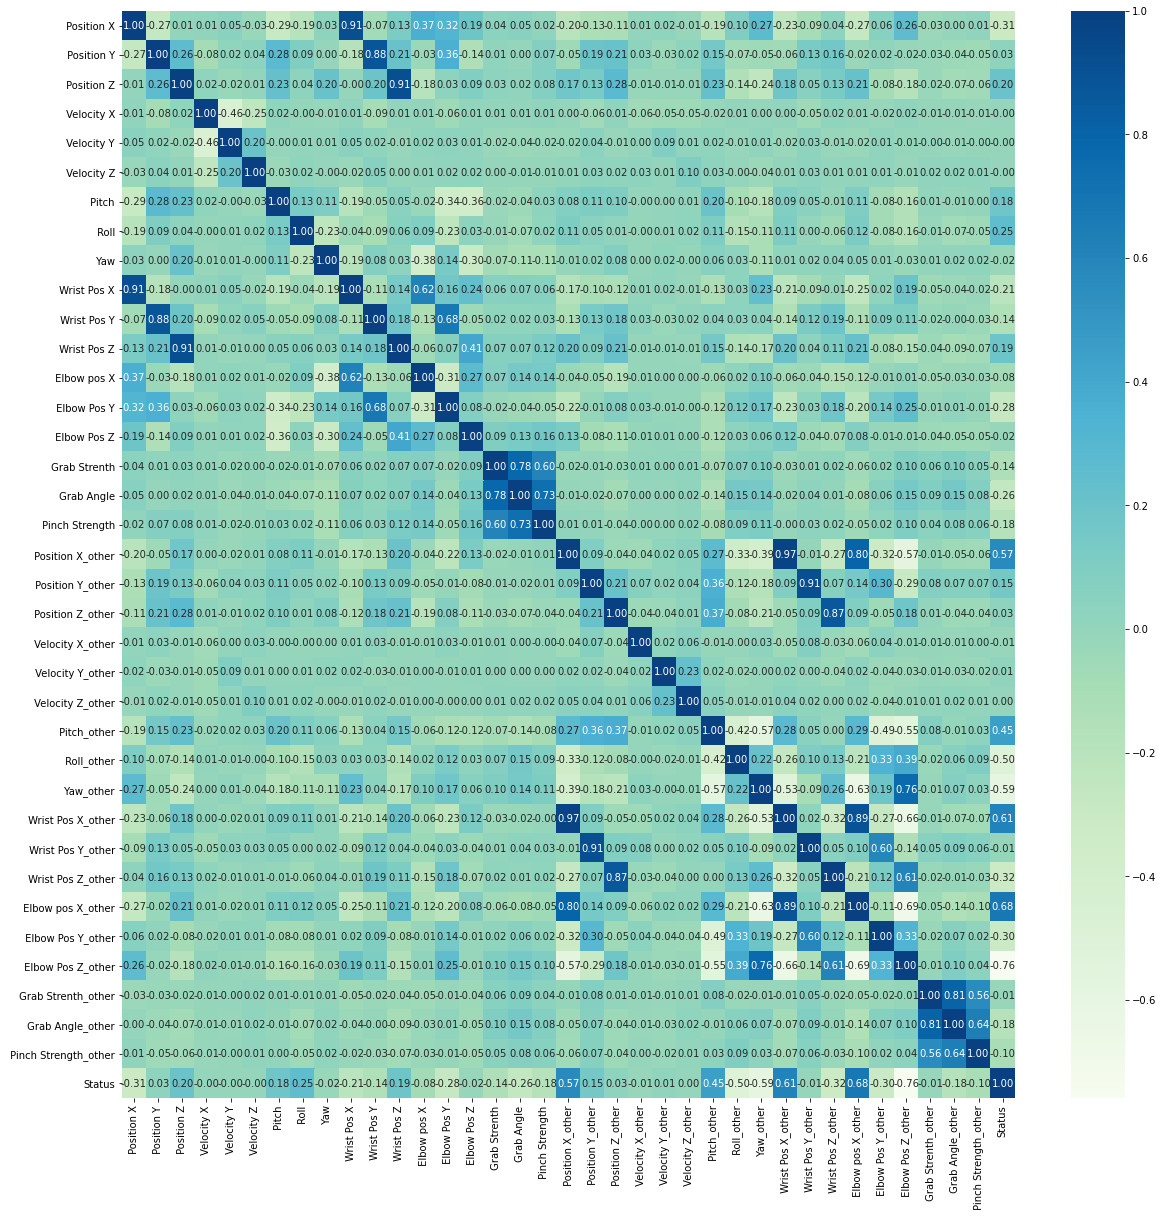

In [429]:
plt.figure(figsize=(20,20))
sns.heatmap(FinalTrain.corr(), cmap = 'GnBu', annot=True, fmt=".2f")

In [483]:
FinalTrain.keys()

Index([' Position X', ' Position Y', ' Position Z', ' Velocity X',
       ' Velocity Y', ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength',
       ' Position X_other', ' Position Y_other', ' Position Z_other',
       ' Velocity X_other', ' Velocity Y_other', ' Velocity Z_other',
       ' Pitch_other', ' Roll_other', ' Yaw_other', ' Wrist Pos X_other',
       ' Wrist Pos Y_other', ' Wrist Pos Z_other', ' Elbow pos X_other',
       ' Elbow Pos Y_other', ' Elbow Pos Z_other', ' Grab Strenth_other',
       ' Grab Angle_other', ' Pinch Strength_other', 'Status'],
      dtype='object')

In [484]:
keys = FinalTrain.keys()

In [485]:
keys_left = keys[:18]
print(len(keys_left))
keys_left

18


Index([' Position X', ' Position Y', ' Position Z', ' Velocity X',
       ' Velocity Y', ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength'],
      dtype='object')

In [486]:
keys_right = keys[18:36]
print(len(keys_right))
keys_right

18


Index([' Position X_other', ' Position Y_other', ' Position Z_other',
       ' Velocity X_other', ' Velocity Y_other', ' Velocity Z_other',
       ' Pitch_other', ' Roll_other', ' Yaw_other', ' Wrist Pos X_other',
       ' Wrist Pos Y_other', ' Wrist Pos Z_other', ' Elbow pos X_other',
       ' Elbow Pos Y_other', ' Elbow Pos Z_other', ' Grab Strenth_other',
       ' Grab Angle_other', ' Pinch Strength_other'],
      dtype='object')

In [487]:
for i in range(0,len(keys_left),1):
    feature_name = keys_left[i] + " - " + keys_right[i]
    FinalTrain[feature_name] = FinalTrain[keys_left[i]] - FinalTrain[keys_right[i]]

In [488]:
FinalTrain

,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,...,Yaw - Yaw_other,Wrist Pos X - Wrist Pos X_other,Wrist Pos Y - Wrist Pos Y_other,Wrist Pos Z - Wrist Pos Z_other,Elbow pos X - Elbow pos X_other,Elbow Pos Y - Elbow Pos Y_other,Elbow Pos Z - Elbow Pos Z_other,Grab Strenth - Grab Strenth_other,Grab Angle - Grab Angle_other,Pinch Strength - Pinch Strength_other
0,-102.28700,198.3166,-2.122641,-174.57210,379.14680,28.479910,1.423625,0.510471,1.481006,-164.0542,...,2.044402,-355.4630,-5.8165,-10.662750,-645.7413,-51.986020,-150.955500,-1.000000,-0.922797,-0.329752
1,-103.87210,201.4944,-2.063620,-178.50250,357.85480,6.646493,1.429039,0.500107,1.486744,-165.7898,...,2.047567,-356.6568,-1.9908,-11.246199,-641.6649,-51.779360,-154.328911,-1.000000,-0.852501,-0.293775
2,-106.36910,207.4667,-2.337110,-126.78780,318.52840,-12.872290,1.441357,0.489946,1.496526,-168.4939,...,2.051149,-358.9486,4.9683,-13.646934,-640.5671,-47.912530,-162.529743,-1.000000,-0.556653,-0.175940
3,-107.95090,212.1324,-2.788956,-74.28078,244.48230,-30.771300,1.444497,0.483316,1.499930,-170.1878,...,2.048738,-360.9902,9.3846,-16.356446,-638.4525,-42.928140,-170.990997,-1.000000,-0.202045,-0.052777
4,-109.54270,216.8003,-3.337280,-96.49666,269.54340,-37.723870,1.431969,0.488396,1.491886,-171.4205,...,2.045763,-364.0006,11.5929,-17.634744,-637.2524,-44.521910,-178.307230,-0.849696,0.071599,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90053,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.012070,0.629213,1.887313,0.429763,-107.8500,...,0.925392,-236.9761,-20.8826,-29.971540,-619.4411,54.338580,9.258200,0.000000,0.000000,0.000000
90054,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.770540,0.667618,1.870251,0.434664,-108.0805,...,0.960308,-237.3673,-19.9417,-29.708270,-600.3249,67.975390,33.964700,0.000000,0.000000,0.000000
90055,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.632770,0.725945,1.838532,0.456099,-109.0018,...,1.030416,-240.8608,-20.1018,-32.199970,-588.5785,57.486774,46.712220,0.000000,0.000000,0.000000
90056,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.959700,0.762549,1.824587,0.459446,-109.7250,...,1.072198,-243.7666,-20.8846,-34.143330,-584.5645,39.160030,45.786710,0.000000,0.000000,0.000000


In [489]:
keys_left = keys_left.drop([' Grab Strenth',' Grab Angle', ' Pinch Strength'])
keys_right = keys_right.drop([' Grab Strenth_other',' Grab Angle_other', ' Pinch Strength_other'])

In [490]:
for i in range(0,len(keys_left),1):
    feature_name = keys_left[i] + " / " +keys_right[i]
    FinalTrain[feature_name] = FinalTrain[keys_left[i]] / FinalTrain[keys_right[i]]
    
FinalTrain

,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,...,Velocity Z / Velocity Z_other,Pitch / Pitch_other,Roll / Roll_other,Yaw / Yaw_other,Wrist Pos X / Wrist Pos X_other,Wrist Pos Y / Wrist Pos Y_other,Wrist Pos Z / Wrist Pos Z_other,Elbow pos X / Elbow pos X_other,Elbow Pos Y / Elbow Pos Y_other,Elbow Pos Z / Elbow Pos Z_other
0,-102.28700,198.3166,-2.122641,-174.57210,379.14680,28.479910,1.423625,0.510471,1.481006,-164.0542,...,3.424785,2.173485,-3.900519,-2.628711,-0.857088,0.965855,-0.187871,-0.995907,-1.444040,0.072241
1,-103.87210,201.4944,-2.063620,-178.50250,357.85480,6.646493,1.429039,0.500107,1.486744,-165.7898,...,0.342505,2.188787,-3.712327,-2.651004,-0.868614,0.988300,-0.223563,-0.985386,-1.568060,0.046522
2,-106.36910,207.4667,-2.337110,-126.78780,318.52840,-12.872290,1.441357,0.489946,1.496526,-168.4939,...,-0.189040,2.259961,-3.633605,-2.698275,-0.884693,1.029272,-0.298159,-0.976370,-1.509135,-0.007158
3,-107.95090,212.1324,-2.788956,-74.28078,244.48230,-30.771300,1.444497,0.483316,1.499930,-170.1878,...,-0.601633,2.372113,-3.392236,-2.733068,-0.891958,1.055108,-0.343920,-0.976065,-1.503682,-0.057439
4,-109.54270,216.8003,-3.337280,-96.49666,269.54340,-37.723870,1.431969,0.488396,1.491886,-171.4205,...,-2.129775,2.516869,-2.956421,-2.693534,-0.890126,1.067353,-0.373697,-0.956172,-1.281933,-0.099819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90053,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.012070,0.629213,1.887313,0.429763,-107.8500,...,0.437960,0.692066,-1.505877,-0.867108,-0.835230,0.859569,0.522929,-1.060147,-0.617859,1.071906
90054,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.770540,0.667618,1.870251,0.434664,-108.0805,...,0.318707,0.678735,-1.509467,-0.826917,-0.835975,0.865363,0.529278,-1.101606,-0.266628,1.320343
90055,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.632770,0.725945,1.838532,0.456099,-109.0018,...,0.459360,0.681425,-1.500182,-0.794158,-0.826654,0.865653,0.512849,-1.075247,0.009445,1.490166
90056,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.959700,0.762549,1.824587,0.459446,-109.7250,...,0.404248,0.686804,-1.502070,-0.749806,-0.818589,0.862232,0.499195,-1.022933,0.276665,1.485854


In [491]:
FinalTrain.isnull().sum()

 Position X                          0
 Position Y                          0
 Position Z                          0
 Velocity X                          0
 Velocity Y                          0
                                    ..
 Wrist Pos Y /  Wrist Pos Y_other    0
 Wrist Pos Z /  Wrist Pos Z_other    0
 Elbow pos X /  Elbow pos X_other    0
 Elbow Pos Y /  Elbow Pos Y_other    0
 Elbow Pos Z /  Elbow Pos Z_other    0
Length: 70, dtype: int64

In [492]:
FinalTrain.keys()

Index([' Position X', ' Position Y', ' Position Z', ' Velocity X',
       ' Velocity Y', ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength',
       ' Position X_other', ' Position Y_other', ' Position Z_other',
       ' Velocity X_other', ' Velocity Y_other', ' Velocity Z_other',
       ' Pitch_other', ' Roll_other', ' Yaw_other', ' Wrist Pos X_other',
       ' Wrist Pos Y_other', ' Wrist Pos Z_other', ' Elbow pos X_other',
       ' Elbow Pos Y_other', ' Elbow Pos Z_other', ' Grab Strenth_other',
       ' Grab Angle_other', ' Pinch Strength_other', 'Status',
       ' Position X -  Position X_other', ' Position Y -  Position Y_other',
       ' Position Z -  Position Z_other', ' Velocity X -  Velocity X_other',
       ' Velocity Y -  Velocity Y_other', ' Velocity Z -  Velocity Z_other',
       ' Pitch -  Pitch_other', ' Roll -  Roll_other'

### Showing the correlation between Position X - Position X_other - Status eich is the correlation between the right hand and the left hand to 'Status'.

Text(0.5, 0, 'Status')

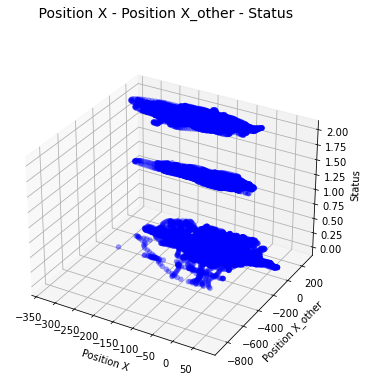

In [430]:
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle(' Position X - Position X_other - Status', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(FinalTrain[' Position X'])
ys = list(FinalTrain[' Position X_other'])
zs = list(FinalTrain['Status'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'red' else 'blue' for wt in list(FinalTrain['Status'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('Position X')
ax.set_ylabel('Position X_other')
ax.set_zlabel('Status')

In [493]:
FinalTest = pd.concat([SpontanDfTest,AloneDfTest,SyncDfTest]).reset_index()
FinalTest.drop(['index',' # hands' ,' # hands_other',' Hand Type' , ' Hand Type_other','Time','Time_other',' Frame ID'
                ,' Frame ID_other'], axis = 1 , inplace = True)

In [494]:
FinalTest

,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,...,Wrist Pos X_other,Wrist Pos Y_other,Wrist Pos Z_other,Elbow pos X_other,Elbow Pos Y_other,Elbow Pos Z_other,Grab Strenth_other,Grab Angle_other,Pinch Strength_other,Status
0,-76.70877,124.8030,39.25731,118.127700,-323.895600,-5.624489,1.728761,0.250364,1.610624,-142.5439,...,199.9615,173.23770,-9.184434,337.6812,-10.744710,70.20915,0.485467,1.854837,0.0,1
1,-75.69178,121.3550,39.42696,47.162250,-173.183500,22.461430,1.787961,0.200273,1.614173,-142.0846,...,204.0428,169.26370,-7.134259,347.0881,-3.939740,85.91518,0.653147,1.844464,0.0,1
2,-75.55283,120.1822,40.23076,-8.253831,-30.596610,50.967570,1.838457,0.174244,1.616919,-142.1196,...,214.1612,174.09070,-5.769496,361.4825,13.252810,101.68830,0.552545,1.713446,0.0,1
3,-75.71603,120.3410,41.08102,-2.480504,-0.195059,43.518670,1.863239,0.152881,1.614753,-142.4346,...,221.4364,180.49210,-3.284249,376.9102,38.317600,118.09900,0.355916,1.529278,0.0,1
4,-75.50552,120.1069,41.36943,24.201610,-26.911250,33.158520,1.860891,0.149135,1.613385,-142.2652,...,224.4512,183.85050,-1.864851,384.0117,51.352850,125.03820,0.297781,1.451686,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12231,-97.79726,133.6108,35.39033,-42.690040,-1.874666,72.099560,0.765636,1.331985,0.870546,-144.3446,...,147.6505,72.60450,75.240090,275.9027,8.049797,269.62600,0.000000,0.351724,0.0,2
12232,-99.02834,133.9962,37.42067,-92.097590,41.385200,153.315900,0.723243,1.339952,0.859011,-145.9045,...,146.9766,72.95663,74.882800,269.8554,8.268721,272.66570,0.000000,0.201761,0.0,2
12233,-99.71982,133.3186,39.83099,-33.370870,13.548700,87.996030,0.704163,1.324794,0.858504,-146.7806,...,145.0302,73.30029,73.294690,263.3588,7.682498,273.53070,0.000000,0.120321,0.0,2
12234,-100.04400,133.8906,40.17663,-51.188420,118.537600,2.515349,0.673300,1.358704,0.838863,-146.3582,...,142.6567,73.31168,70.971580,259.8077,5.827618,271.27970,0.000000,0.057268,0.0,2


In [495]:
keys = FinalTest.keys()

In [496]:
keys_left = keys[:18]
print(len(keys_left))
keys_left

18


Index([' Position X', ' Position Y', ' Position Z', ' Velocity X',
       ' Velocity Y', ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength'],
      dtype='object')

In [497]:
keys_right = keys[18:36]
print(len(keys_right))
keys_right

18


Index([' Position X_other', ' Position Y_other', ' Position Z_other',
       ' Velocity X_other', ' Velocity Y_other', ' Velocity Z_other',
       ' Pitch_other', ' Roll_other', ' Yaw_other', ' Wrist Pos X_other',
       ' Wrist Pos Y_other', ' Wrist Pos Z_other', ' Elbow pos X_other',
       ' Elbow Pos Y_other', ' Elbow Pos Z_other', ' Grab Strenth_other',
       ' Grab Angle_other', ' Pinch Strength_other'],
      dtype='object')

In [498]:
for i in range(0,len(keys_left),1):
    feature_name = keys_left[i] + " - " + keys_right[i]
    FinalTest[feature_name] = FinalTest[keys_left[i]] - FinalTest[keys_right[i]]

In [499]:
FinalTest

,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,...,Yaw - Yaw_other,Wrist Pos X - Wrist Pos X_other,Wrist Pos Y - Wrist Pos Y_other,Wrist Pos Z - Wrist Pos Z_other,Elbow pos X - Elbow pos X_other,Elbow Pos Y - Elbow Pos Y_other,Elbow Pos Z - Elbow Pos Z_other,Grab Strenth - Grab Strenth_other,Grab Angle - Grab Angle_other,Pinch Strength - Pinch Strength_other
0,-76.70877,124.8030,39.25731,118.127700,-323.895600,-5.624489,1.728761,0.250364,1.610624,-142.5439,...,2.792562,-342.5054,-63.33730,41.580864,-680.0678,-11.621920,3.27103,-0.485467,-0.624685,0.141951
1,-75.69178,121.3550,39.42696,47.162250,-173.183500,22.461430,1.787961,0.200273,1.614173,-142.0846,...,2.761309,-346.1274,-59.63230,39.561879,-691.9990,-13.625570,-11.03682,-0.653147,-0.680300,0.006639
2,-75.55283,120.1822,40.23076,-8.253831,-30.596610,50.967570,1.838457,0.174244,1.616919,-142.1196,...,2.773258,-356.2808,-63.96650,39.144236,-704.7002,-31.372890,-21.06383,-0.433754,-0.657078,0.000000
3,-75.71603,120.3410,41.08102,-2.480504,-0.195059,43.518670,1.863239,0.152881,1.614753,-142.4346,...,2.747810,-363.8710,-68.83530,37.972699,-719.5700,-53.673520,-29.58484,-0.226501,-0.505213,0.013003
4,-75.50552,120.1069,41.36943,24.201610,-26.911250,33.158520,1.860891,0.149135,1.613385,-142.2652,...,2.729625,-366.7164,-72.18770,36.997911,-727.0671,-64.687740,-33.52712,-0.198541,-0.385320,0.066338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12231,-97.79726,133.6108,35.39033,-42.690040,-1.874666,72.099560,0.765636,1.331985,0.870546,-144.3446,...,1.608743,-291.9951,23.54912,-8.184490,-611.0551,43.426783,-61.15560,0.000000,-0.351724,0.000000
12232,-99.02834,133.9962,37.42067,-92.097590,41.385200,153.315900,0.723243,1.339952,0.859011,-145.9045,...,1.583487,-292.8811,24.93303,-4.562350,-604.4089,42.357599,-58.88950,0.000000,-0.122493,0.000000
12233,-99.71982,133.3186,39.83099,-33.370870,13.548700,87.996030,0.704163,1.324794,0.858504,-146.7806,...,1.572724,-291.8108,24.22904,-0.220480,-593.6492,28.967922,-55.47460,0.000000,0.102740,0.000000
12234,-100.04400,133.8906,40.17663,-51.188420,118.537600,2.515349,0.673300,1.358704,0.838863,-146.3582,...,1.541735,-289.0149,25.10489,3.942310,-579.8483,21.893722,-43.92430,0.000000,0.184351,0.000000


In [500]:
keys_left = keys_left.drop([' Grab Strenth',' Grab Angle', ' Pinch Strength'])
keys_right = keys_right.drop([' Grab Strenth_other',' Grab Angle_other', ' Pinch Strength_other'])

In [501]:
for i in range(0,len(keys_left),1):
    feature_name = keys_left[i] + " / " +keys_right[i]
    FinalTest[feature_name] = FinalTest[keys_left[i]] / FinalTest[keys_right[i]]
    
FinalTest

,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,...,Velocity Z / Velocity Z_other,Pitch / Pitch_other,Roll / Roll_other,Yaw / Yaw_other,Wrist Pos X / Wrist Pos X_other,Wrist Pos Y / Wrist Pos Y_other,Wrist Pos Z / Wrist Pos Z_other,Elbow pos X / Elbow pos X_other,Elbow Pos Y / Elbow Pos Y_other,Elbow Pos Z / Elbow Pos Z_other
0,-76.70877,124.8030,39.25731,118.127700,-323.895600,-5.624489,1.728761,0.250364,1.610624,-142.5439,...,0.040917,1.407025,-0.297967,-1.362698,-0.712857,0.634391,-3.527319,-1.013934,2.081641,1.046590
1,-75.69178,121.3550,39.42696,47.162250,-173.183500,22.461430,1.787961,0.200273,1.614173,-142.0846,...,-0.211561,1.593166,-0.273033,-1.407133,-0.696347,0.647696,-4.545338,-0.993727,4.458495,0.871538
2,-75.55283,120.1822,40.23076,-8.253831,-30.596610,50.967570,1.838457,0.174244,1.616919,-142.1196,...,-0.688444,1.945144,-0.318643,-1.398309,-0.663610,0.632568,-5.784689,-0.949473,-1.367263,0.792859
3,-75.71603,120.3410,41.08102,-2.480504,-0.195059,43.518670,1.863239,0.152881,1.614753,-142.4346,...,-1.147622,3.023521,-0.427786,-1.425130,-0.643230,0.618624,-10.562065,-0.909128,-0.400754,0.749491
4,-75.50552,120.1069,41.36943,24.201610,-26.911250,33.158520,1.860891,0.149135,1.613385,-142.2652,...,-0.961943,4.645492,-0.558919,-1.445375,-0.633836,0.607357,-18.839607,-0.893346,-0.259672,0.731865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12231,-97.79726,133.6108,35.39033,-42.690040,-1.874666,72.099560,0.765636,1.331985,0.870546,-144.3446,...,-2.069909,1.036477,-1.353148,-1.179286,-0.977610,1.324348,0.891222,-1.214749,6.394767,0.773184
12232,-99.02834,133.9962,37.42067,-92.097590,41.385200,153.315900,0.723243,1.339952,0.859011,-145.9045,...,-1.155001,1.014822,-1.379171,-1.185700,-0.992706,1.341751,0.939073,-1.239751,6.122630,0.784023
12233,-99.71982,133.3186,39.83099,-33.370870,13.548700,87.996030,0.704163,1.324794,0.858504,-146.7806,...,-0.619164,1.013495,-1.396933,-1.202016,-1.012069,1.330545,0.996992,-1.254146,4.770638,0.797191
12234,-100.04400,133.8906,40.17663,-51.188420,118.537600,2.515349,0.673300,1.358704,0.838863,-146.3582,...,-0.012958,0.985180,-1.453792,-1.193479,-1.025947,1.342441,1.055548,-1.231836,4.756890,0.838085


In [502]:
FinalTestVal = pd.concat([SpontanDfTestVal,AloneDfTestVal,SyncDfTestVal]).reset_index()
FinalTestVal.drop(['index',' # hands' ,' # hands_other',' Hand Type' , ' Hand Type_other','Time','Time_other',' Frame ID'
                   ,' Frame ID_other'], axis = 1 , inplace = True)

In [503]:
FinalTestVal

,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,...,Wrist Pos X_other,Wrist Pos Y_other,Wrist Pos Z_other,Elbow pos X_other,Elbow Pos Y_other,Elbow Pos Z_other,Grab Strenth_other,Grab Angle_other,Pinch Strength_other,Status
0,-159.34530,203.1198,28.149560,1.868645,37.01694,-11.42015,0.417738,2.161856,0.904842,-213.8900,...,164.3573,159.7095,25.43896,243.8085,-34.59677,163.74920,0.0,0.000000,0.0,1
1,-158.83040,202.9772,27.929490,41.384500,-18.25130,-16.37026,0.394822,2.177706,0.898561,-213.3517,...,165.6616,161.6832,26.45107,247.7545,-32.00053,164.09020,0.0,0.000000,0.0,1
2,-158.15580,202.7527,27.746980,47.141900,-20.65330,-14.79889,0.381070,2.201845,0.892868,-212.5132,...,167.0913,164.0732,27.55513,251.2191,-29.17511,164.57630,0.0,0.000000,0.0,1
3,-157.66540,202.5851,27.590540,56.519950,-19.32211,-18.02981,0.377304,2.210599,0.890015,-211.9200,...,167.3190,164.5545,27.96732,252.6738,-28.27396,164.82090,0.0,0.000000,0.0,1
4,-156.93110,202.3219,27.281520,35.349590,-13.85674,-14.19096,0.374588,2.224526,0.888334,-211.1217,...,167.7623,165.5259,28.97613,254.7319,-26.80494,165.51290,0.0,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,-83.05518,231.9804,4.464823,-7.706972,-71.95823,-14.44624,1.110529,1.168697,0.576959,-109.7053,...,216.0310,208.1819,-31.92461,393.5938,58.41402,60.32609,0.0,0.572660,0.0,2
30326,-83.29484,231.4965,4.276440,-27.271270,-55.06426,-21.43638,1.113917,1.170433,0.574325,-109.7865,...,216.5802,207.2135,-32.49741,396.3757,59.28743,58.42815,0.0,0.486283,0.0,2
30327,-83.12682,228.5704,3.154643,20.873310,-155.43110,-48.61480,1.128764,1.174766,0.567272,-109.2328,...,217.7858,203.0023,-33.08805,401.2775,60.24324,58.74638,0.0,0.401037,0.0,2
30328,-82.82680,226.9256,2.670630,34.805350,-190.81300,-56.14997,1.127014,1.158560,0.587990,-109.7948,...,217.7753,201.1944,-33.31472,400.1559,57.76727,59.68469,0.0,0.268522,0.0,2


In [504]:
keys = FinalTestVal.keys()

In [505]:
keys_left = keys[:18]
print(len(keys_left))
keys_left

18


Index([' Position X', ' Position Y', ' Position Z', ' Velocity X',
       ' Velocity Y', ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength'],
      dtype='object')

In [506]:
keys_right = keys[18:36]
print(len(keys_right))
keys_right

18


Index([' Position X_other', ' Position Y_other', ' Position Z_other',
       ' Velocity X_other', ' Velocity Y_other', ' Velocity Z_other',
       ' Pitch_other', ' Roll_other', ' Yaw_other', ' Wrist Pos X_other',
       ' Wrist Pos Y_other', ' Wrist Pos Z_other', ' Elbow pos X_other',
       ' Elbow Pos Y_other', ' Elbow Pos Z_other', ' Grab Strenth_other',
       ' Grab Angle_other', ' Pinch Strength_other'],
      dtype='object')

In [507]:
for i in range(0,len(keys_left),1):
    feature_name = keys_left[i] + " - " + keys_right[i]
    FinalTestVal[feature_name] = FinalTestVal[keys_left[i]] - FinalTestVal[keys_right[i]]

In [508]:
FinalTestVal

,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,...,Yaw - Yaw_other,Wrist Pos X - Wrist Pos X_other,Wrist Pos Y - Wrist Pos Y_other,Wrist Pos Z - Wrist Pos Z_other,Elbow pos X - Elbow pos X_other,Elbow Pos Y - Elbow Pos Y_other,Elbow Pos Z - Elbow Pos Z_other,Grab Strenth - Grab Strenth_other,Grab Angle - Grab Angle_other,Pinch Strength - Pinch Strength_other
0,-159.34530,203.1198,28.149560,1.868645,37.01694,-11.42015,0.417738,2.161856,0.904842,-213.8900,...,1.241462,-378.2473,17.4712,39.36033,-692.6675,158.48307,-27.21120,1.0,2.590619,0.653887
1,-158.83040,202.9772,27.929490,41.384500,-18.25130,-16.37026,0.394822,2.177706,0.898561,-213.3517,...,1.242723,-379.0133,16.1171,38.69657,-696.1322,156.64943,-27.28440,1.0,2.661068,0.763163
2,-158.15580,202.7527,27.746980,47.141900,-20.65330,-14.79889,0.381070,2.201845,0.892868,-212.5132,...,1.240554,-379.6045,13.9130,37.91901,-698.5337,153.87481,-26.81090,1.0,2.728972,0.806444
3,-157.66540,202.5851,27.590540,56.519950,-19.32211,-18.02981,0.377304,2.210599,0.890015,-211.9200,...,1.235736,-379.2390,13.3527,37.54878,-699.3889,152.83606,-27.03650,1.0,2.772963,0.802550
4,-156.93110,202.3219,27.281520,35.349590,-13.85674,-14.19096,0.374588,2.224526,0.888334,-211.1217,...,1.233415,-378.8840,12.1565,36.33298,-700.9496,150.46034,-29.43550,1.0,2.839774,0.778862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,-83.05518,231.9804,4.464823,-7.706972,-71.95823,-14.44624,1.110529,1.168697,0.576959,-109.7053,...,1.869059,-325.7363,-36.9348,60.43649,-604.9470,-93.32519,66.34701,0.0,-0.572660,0.000000
30326,-83.29484,231.4965,4.276440,-27.271270,-55.06426,-21.43638,1.113917,1.170433,0.574325,-109.7865,...,1.875111,-326.3667,-36.5611,60.72070,-607.9812,-94.45390,68.52445,0.0,-0.486283,0.000000
30327,-83.12682,228.5704,3.154643,20.873310,-155.43110,-48.61480,1.128764,1.174766,0.567272,-109.2328,...,1.873244,-327.0186,-35.6344,59.69080,-616.6882,-95.80322,68.00362,0.0,-0.401037,0.000000
30328,-82.82680,226.9256,2.670630,34.805350,-190.81300,-56.14997,1.127014,1.158560,0.587990,-109.7948,...,1.903218,-327.5701,-35.0779,59.47841,-618.5045,-93.10884,67.04571,0.0,-0.268522,0.000000


In [509]:
keys_left = keys_left.drop([' Grab Strenth',' Grab Angle', ' Pinch Strength'])
keys_right = keys_right.drop([' Grab Strenth_other',' Grab Angle_other', ' Pinch Strength_other'])

In [510]:
for i in range(0,len(keys_left),1):
    feature_name = keys_left[i] + " / " +keys_right[i]
    FinalTestVal[feature_name] = FinalTestVal[keys_left[i]] / FinalTestVal[keys_right[i]]
    
FinalTestVal

,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,...,Velocity Z / Velocity Z_other,Pitch / Pitch_other,Roll / Roll_other,Yaw / Yaw_other,Wrist Pos X / Wrist Pos X_other,Wrist Pos Y / Wrist Pos Y_other,Wrist Pos Z / Wrist Pos Z_other,Elbow pos X / Elbow pos X_other,Elbow Pos Y / Elbow Pos Y_other,Elbow Pos Z / Elbow Pos Z_other
0,-159.34530,203.1198,28.149560,1.868645,37.01694,-11.42015,0.417738,2.161856,0.904842,-213.8900,...,-0.109633,0.524706,-3.334720,-2.688024,-1.301372,1.109394,2.547246,-1.841031,-3.580863,0.833824
1,-158.83040,202.9772,27.929490,41.384500,-18.25130,-16.37026,0.394822,2.177706,0.898561,-213.3517,...,-0.169135,0.485518,-3.326900,-2.610869,-1.287877,1.099683,2.462949,-1.809766,-3.895214,0.833723
2,-158.15580,202.7527,27.746980,47.141900,-20.65330,-14.79889,0.381070,2.201845,0.892868,-212.5132,...,-0.173027,0.463340,-3.307325,-2.568031,-1.271839,1.084798,2.376114,-1.780576,-4.274181,0.837091
3,-157.66540,202.5851,27.590540,56.519950,-19.32211,-18.02981,0.377304,2.210599,0.890015,-211.9200,...,-0.211379,0.454242,-3.275527,-2.574369,-1.266563,1.081145,2.342595,-1.767952,-4.405541,0.835964
4,-156.93110,202.3219,27.281520,35.349590,-13.85674,-14.19096,0.374588,2.224526,0.888334,-211.1217,...,-0.190380,0.447077,-3.231158,-2.574276,-1.258457,1.073442,2.253893,-1.751715,-4.613157,0.822156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,-83.05518,231.9804,4.464823,-7.706972,-71.95823,-14.44624,1.110529,1.168697,0.576959,-109.7053,...,0.910974,1.893353,-4.808829,-0.446528,-0.507822,0.822584,-0.893100,-0.536983,-0.597651,2.099806
30326,-83.29484,231.4965,4.276440,-27.271270,-55.06426,-21.43638,1.113917,1.170433,0.574325,-109.7865,...,2.772508,2.281261,-5.629580,-0.441522,-0.506909,0.823558,-0.868478,-0.533851,-0.593152,2.172799
30327,-83.12682,228.5704,3.154643,20.873310,-155.43110,-48.61480,1.128764,1.174766,0.567272,-109.2328,...,2.169322,4.522699,-8.804652,-0.434367,-0.501561,0.824463,-0.803999,-0.536812,-0.590273,2.157580
30328,-82.82680,226.9256,2.670630,34.805350,-190.81300,-56.14997,1.127014,1.158560,0.587990,-109.7948,...,-2.065414,9.596680,-12.054706,-0.447063,-0.504166,0.825652,-0.785349,-0.545659,-0.611792,2.123332


## Searching and droping the inf values for each list:

#### For Train:

In [511]:
# checking for infinity
print()
print("checking for infinity")
  
ds = FinalTrain.isin([np.inf, -np.inf])
print(ds)
  
# printing the count of infinity values
print()
print("printing the count of infinity values")
  
count = np.isinf(FinalTrain).values.sum()
print("It contains " + str(count) + " infinite values")
  

# printing column name where infinity is present
print()
print("printing column name where infinity is present")
col_name = FinalTrain.columns.to_series()[np.isinf(FinalTrain).any()]
print(col_name)
  
# printing row index with infinity
print()
print("printing row index with infinity ")
  
r = FinalTrain.index[np.isinf(FinalTrain).any(1)]
print(r)


checking for infinity
        Position X   Position Y   Position Z   Velocity X   Velocity Y  \
0            False        False        False        False        False   
1            False        False        False        False        False   
2            False        False        False        False        False   
3            False        False        False        False        False   
4            False        False        False        False        False   
...            ...          ...          ...          ...          ...   
90053        False        False        False        False        False   
90054        False        False        False        False        False   
90055        False        False        False        False        False   
90056        False        False        False        False        False   
90057        False        False        False        False        False   

        Velocity Z   Pitch   Roll    Yaw   Wrist Pos X  ...  \
0            False   Fals

In [512]:
FinalTrain = FinalTrain.drop(r)

In [513]:
FinalTrain

,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,...,Velocity Z / Velocity Z_other,Pitch / Pitch_other,Roll / Roll_other,Yaw / Yaw_other,Wrist Pos X / Wrist Pos X_other,Wrist Pos Y / Wrist Pos Y_other,Wrist Pos Z / Wrist Pos Z_other,Elbow pos X / Elbow pos X_other,Elbow Pos Y / Elbow Pos Y_other,Elbow Pos Z / Elbow Pos Z_other
0,-102.28700,198.3166,-2.122641,-174.57210,379.14680,28.479910,1.423625,0.510471,1.481006,-164.0542,...,3.424785,2.173485,-3.900519,-2.628711,-0.857088,0.965855,-0.187871,-0.995907,-1.444040,0.072241
1,-103.87210,201.4944,-2.063620,-178.50250,357.85480,6.646493,1.429039,0.500107,1.486744,-165.7898,...,0.342505,2.188787,-3.712327,-2.651004,-0.868614,0.988300,-0.223563,-0.985386,-1.568060,0.046522
2,-106.36910,207.4667,-2.337110,-126.78780,318.52840,-12.872290,1.441357,0.489946,1.496526,-168.4939,...,-0.189040,2.259961,-3.633605,-2.698275,-0.884693,1.029272,-0.298159,-0.976370,-1.509135,-0.007158
3,-107.95090,212.1324,-2.788956,-74.28078,244.48230,-30.771300,1.444497,0.483316,1.499930,-170.1878,...,-0.601633,2.372113,-3.392236,-2.733068,-0.891958,1.055108,-0.343920,-0.976065,-1.503682,-0.057439
4,-109.54270,216.8003,-3.337280,-96.49666,269.54340,-37.723870,1.431969,0.488396,1.491886,-171.4205,...,-2.129775,2.516869,-2.956421,-2.693534,-0.890126,1.067353,-0.373697,-0.956172,-1.281933,-0.099819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90053,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.012070,0.629213,1.887313,0.429763,-107.8500,...,0.437960,0.692066,-1.505877,-0.867108,-0.835230,0.859569,0.522929,-1.060147,-0.617859,1.071906
90054,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.770540,0.667618,1.870251,0.434664,-108.0805,...,0.318707,0.678735,-1.509467,-0.826917,-0.835975,0.865363,0.529278,-1.101606,-0.266628,1.320343
90055,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.632770,0.725945,1.838532,0.456099,-109.0018,...,0.459360,0.681425,-1.500182,-0.794158,-0.826654,0.865653,0.512849,-1.075247,0.009445,1.490166
90056,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.959700,0.762549,1.824587,0.459446,-109.7250,...,0.404248,0.686804,-1.502070,-0.749806,-0.818589,0.862232,0.499195,-1.022933,0.276665,1.485854


#### For Test:

In [514]:
print()
print("checking for infinity")
  
ds = FinalTest.isin([np.inf, -np.inf])
print(ds)
  
# printing the count of infinity values
print()
print("printing the count of infinity values")
  
count = np.isinf(FinalTest).values.sum()
print("It contains " + str(count) + " infinite values")
  

# printing column name where infinity is present
print()
print("printing column name where infinity is present")
col_name = FinalTest.columns.to_series()[np.isinf(FinalTest).any()]
print(col_name)
  
# printing row index with infinity
print()
print("printing row index with infinity ")
  
s = FinalTest.index[np.isinf(FinalTest).any(1)]
print(s)


checking for infinity
        Position X   Position Y   Position Z   Velocity X   Velocity Y  \
0            False        False        False        False        False   
1            False        False        False        False        False   
2            False        False        False        False        False   
3            False        False        False        False        False   
4            False        False        False        False        False   
...            ...          ...          ...          ...          ...   
12231        False        False        False        False        False   
12232        False        False        False        False        False   
12233        False        False        False        False        False   
12234        False        False        False        False        False   
12235        False        False        False        False        False   

        Velocity Z   Pitch   Roll    Yaw   Wrist Pos X  ...  \
0            False   Fals

In [515]:
FinalTest = FinalTest.drop(s)

In [516]:
FinalTest

,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,...,Velocity Z / Velocity Z_other,Pitch / Pitch_other,Roll / Roll_other,Yaw / Yaw_other,Wrist Pos X / Wrist Pos X_other,Wrist Pos Y / Wrist Pos Y_other,Wrist Pos Z / Wrist Pos Z_other,Elbow pos X / Elbow pos X_other,Elbow Pos Y / Elbow Pos Y_other,Elbow Pos Z / Elbow Pos Z_other
0,-76.70877,124.8030,39.25731,118.127700,-323.895600,-5.624489,1.728761,0.250364,1.610624,-142.5439,...,0.040917,1.407025,-0.297967,-1.362698,-0.712857,0.634391,-3.527319,-1.013934,2.081641,1.046590
1,-75.69178,121.3550,39.42696,47.162250,-173.183500,22.461430,1.787961,0.200273,1.614173,-142.0846,...,-0.211561,1.593166,-0.273033,-1.407133,-0.696347,0.647696,-4.545338,-0.993727,4.458495,0.871538
2,-75.55283,120.1822,40.23076,-8.253831,-30.596610,50.967570,1.838457,0.174244,1.616919,-142.1196,...,-0.688444,1.945144,-0.318643,-1.398309,-0.663610,0.632568,-5.784689,-0.949473,-1.367263,0.792859
3,-75.71603,120.3410,41.08102,-2.480504,-0.195059,43.518670,1.863239,0.152881,1.614753,-142.4346,...,-1.147622,3.023521,-0.427786,-1.425130,-0.643230,0.618624,-10.562065,-0.909128,-0.400754,0.749491
4,-75.50552,120.1069,41.36943,24.201610,-26.911250,33.158520,1.860891,0.149135,1.613385,-142.2652,...,-0.961943,4.645492,-0.558919,-1.445375,-0.633836,0.607357,-18.839607,-0.893346,-0.259672,0.731865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12231,-97.79726,133.6108,35.39033,-42.690040,-1.874666,72.099560,0.765636,1.331985,0.870546,-144.3446,...,-2.069909,1.036477,-1.353148,-1.179286,-0.977610,1.324348,0.891222,-1.214749,6.394767,0.773184
12232,-99.02834,133.9962,37.42067,-92.097590,41.385200,153.315900,0.723243,1.339952,0.859011,-145.9045,...,-1.155001,1.014822,-1.379171,-1.185700,-0.992706,1.341751,0.939073,-1.239751,6.122630,0.784023
12233,-99.71982,133.3186,39.83099,-33.370870,13.548700,87.996030,0.704163,1.324794,0.858504,-146.7806,...,-0.619164,1.013495,-1.396933,-1.202016,-1.012069,1.330545,0.996992,-1.254146,4.770638,0.797191
12234,-100.04400,133.8906,40.17663,-51.188420,118.537600,2.515349,0.673300,1.358704,0.838863,-146.3582,...,-0.012958,0.985180,-1.453792,-1.193479,-1.025947,1.342441,1.055548,-1.231836,4.756890,0.838085


#### For testVal:

In [517]:
# checking for infinity
print()
print("checking for infinity")
  
ds = FinalTestVal.isin([np.inf, -np.inf])
print(ds)
  
# printing the count of infinity values
print()
print("printing the count of infinity values")
  
count = np.isinf(FinalTestVal).values.sum()
print("It contains " + str(count) + " infinite values")
  

# printing column name where infinity is present
print()
print("printing column name where infinity is present")
col_name = FinalTestVal.columns.to_series()[np.isinf(FinalTestVal).any()]
print(col_name)
  
# printing row index with infinity
print()
print("printing row index with infinity ")
  
m = FinalTestVal.index[np.isinf(FinalTestVal).any(1)]
print(m)


checking for infinity
        Position X   Position Y   Position Z   Velocity X   Velocity Y  \
0            False        False        False        False        False   
1            False        False        False        False        False   
2            False        False        False        False        False   
3            False        False        False        False        False   
4            False        False        False        False        False   
...            ...          ...          ...          ...          ...   
30325        False        False        False        False        False   
30326        False        False        False        False        False   
30327        False        False        False        False        False   
30328        False        False        False        False        False   
30329        False        False        False        False        False   

        Velocity Z   Pitch   Roll    Yaw   Wrist Pos X  ...  \
0            False   Fals

In [518]:
FinalTestVal = FinalTestVal.drop(m)

In [519]:
FinalTestVal

,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,...,Velocity Z / Velocity Z_other,Pitch / Pitch_other,Roll / Roll_other,Yaw / Yaw_other,Wrist Pos X / Wrist Pos X_other,Wrist Pos Y / Wrist Pos Y_other,Wrist Pos Z / Wrist Pos Z_other,Elbow pos X / Elbow pos X_other,Elbow Pos Y / Elbow Pos Y_other,Elbow Pos Z / Elbow Pos Z_other
0,-159.34530,203.1198,28.149560,1.868645,37.01694,-11.42015,0.417738,2.161856,0.904842,-213.8900,...,-0.109633,0.524706,-3.334720,-2.688024,-1.301372,1.109394,2.547246,-1.841031,-3.580863,0.833824
1,-158.83040,202.9772,27.929490,41.384500,-18.25130,-16.37026,0.394822,2.177706,0.898561,-213.3517,...,-0.169135,0.485518,-3.326900,-2.610869,-1.287877,1.099683,2.462949,-1.809766,-3.895214,0.833723
2,-158.15580,202.7527,27.746980,47.141900,-20.65330,-14.79889,0.381070,2.201845,0.892868,-212.5132,...,-0.173027,0.463340,-3.307325,-2.568031,-1.271839,1.084798,2.376114,-1.780576,-4.274181,0.837091
3,-157.66540,202.5851,27.590540,56.519950,-19.32211,-18.02981,0.377304,2.210599,0.890015,-211.9200,...,-0.211379,0.454242,-3.275527,-2.574369,-1.266563,1.081145,2.342595,-1.767952,-4.405541,0.835964
4,-156.93110,202.3219,27.281520,35.349590,-13.85674,-14.19096,0.374588,2.224526,0.888334,-211.1217,...,-0.190380,0.447077,-3.231158,-2.574276,-1.258457,1.073442,2.253893,-1.751715,-4.613157,0.822156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,-83.05518,231.9804,4.464823,-7.706972,-71.95823,-14.44624,1.110529,1.168697,0.576959,-109.7053,...,0.910974,1.893353,-4.808829,-0.446528,-0.507822,0.822584,-0.893100,-0.536983,-0.597651,2.099806
30326,-83.29484,231.4965,4.276440,-27.271270,-55.06426,-21.43638,1.113917,1.170433,0.574325,-109.7865,...,2.772508,2.281261,-5.629580,-0.441522,-0.506909,0.823558,-0.868478,-0.533851,-0.593152,2.172799
30327,-83.12682,228.5704,3.154643,20.873310,-155.43110,-48.61480,1.128764,1.174766,0.567272,-109.2328,...,2.169322,4.522699,-8.804652,-0.434367,-0.501561,0.824463,-0.803999,-0.536812,-0.590273,2.157580
30328,-82.82680,226.9256,2.670630,34.805350,-190.81300,-56.14997,1.127014,1.158560,0.587990,-109.7948,...,-2.065414,9.596680,-12.054706,-0.447063,-0.504166,0.825652,-0.785349,-0.545659,-0.611792,2.123332


### Definig x an y for each Data frame and making standart on them:

In [520]:
x_test=FinalTest.drop(columns=['Status'])
y_test=FinalTest['Status']
x_train=FinalTrain.drop(columns=['Status'])
y_train=FinalTrain['Status']
x_test_val=FinalTestVal.drop(columns=['Status'])
y_test_val=FinalTestVal['Status']

In [521]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [522]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
def score_plot(y_predict, Y_test, model, accuracy):
    y_pred_series = pd.Series(y_predict, index = Y_test.index)

    cm = confusion_matrix(Y_test, y_pred_series)
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap='GnBu')
    title = str(type(model).__name__) + " score = " + str(accuracy)[:5]
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, ['alone', 'spontany', 'sync'], rotation=45, size = 15)
    plt.yticks(tick_marks, ['alone', 'spontany', 'sync'], size = 15)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center')
            
def model_val_score(model, X, X_test, Y, Y_test):
    model.fit(X, Y)
    y_predict = model.predict(X_test)
    score = metrics.accuracy_score(y_predict, Y_test)
    score_plot(y_predict=y_predict, Y_test=Y_test, model=model, accuracy=score)

# Startin to use scallers on the train and test (at the best model we will predict the Testval):

### Xgboost :

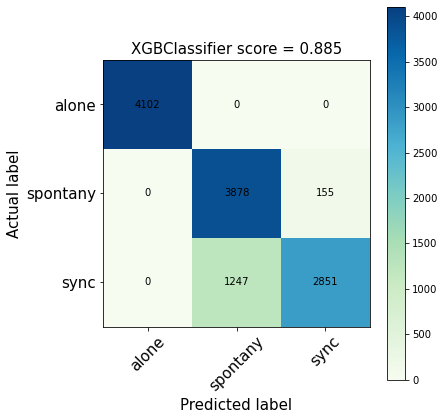

In [524]:
xgb_clf=xgb.XGBClassifier( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eval_metric='mlogloss',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=10,
             monotone_constraints='()', n_estimators=400, n_jobs=-1,
             num_parallel_tree=1, objective='multi:softprob', random_state=42,
             reg_alpha=1, reg_lambda=5, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None,use_label_encoder= False)
model_val_score(xgb_clf,x_train, x_test, y_train, y_test)

### LogisticRegression:

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


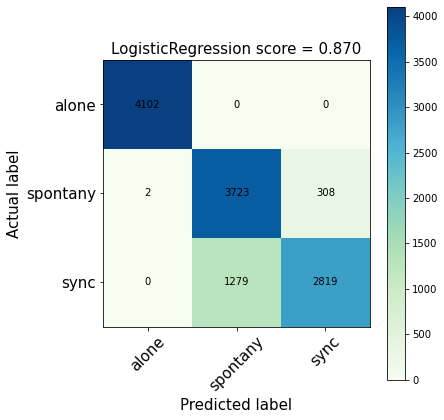

In [525]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
model_val_score(log,x_train, x_test, y_train, y_test)

### RandomForest using bagging:

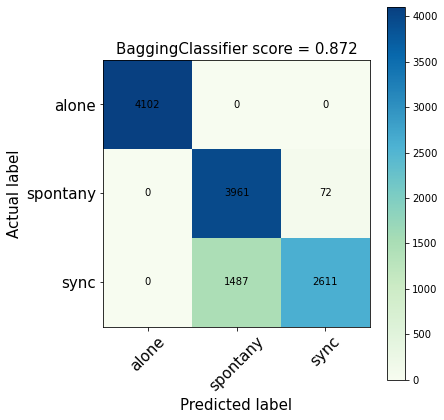

In [526]:
from sklearn.ensemble import BaggingClassifier
ranfor = BaggingClassifier(base_estimator=RandomForestClassifier(),
                      n_estimators=10, random_state=0)
model_val_score(ranfor,x_train, x_test, y_train, y_test)

### AdaBoost:

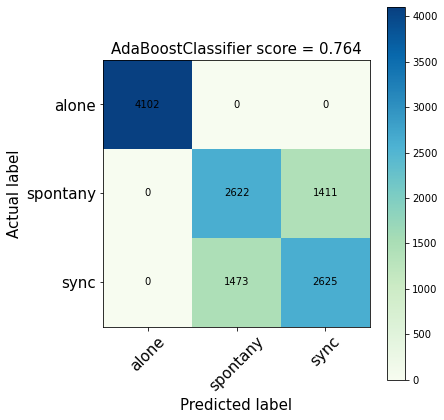

In [527]:
from sklearn.ensemble import AdaBoostClassifier
ad =AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R')
model_val_score(ad,x_train, x_test, y_train, y_test)

### RandomForest without Bagging:

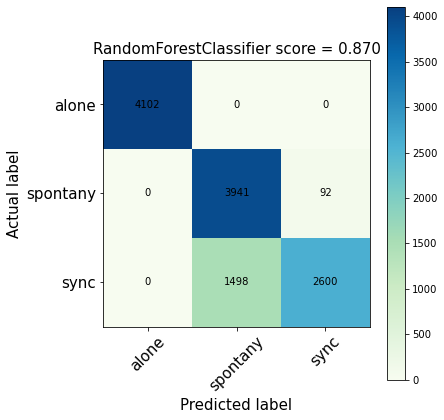

In [528]:
rf = RandomForestClassifier()
model_val_score(rf,x_train, x_test, y_train, y_test)

### Stacking:

In [529]:
estimators = [('xg', xgb_clf ),('rf',rf)]

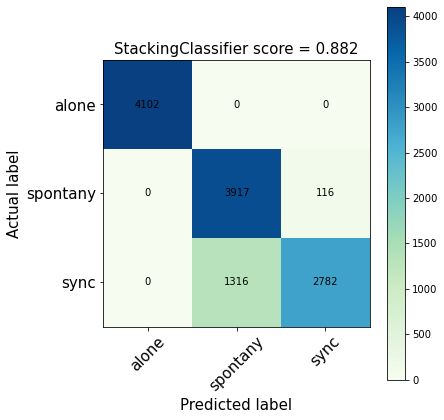

In [530]:
from sklearn.ensemble import StackingClassifier
stclf= StackingClassifier(
   estimators=estimators, final_estimator=log)
model_val_score(stclf,x_train, x_test, y_train, y_test)

### Voting:

In [531]:
estimators = [('xg', xgb_clf ),('rf',rf),('lg', log)]

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


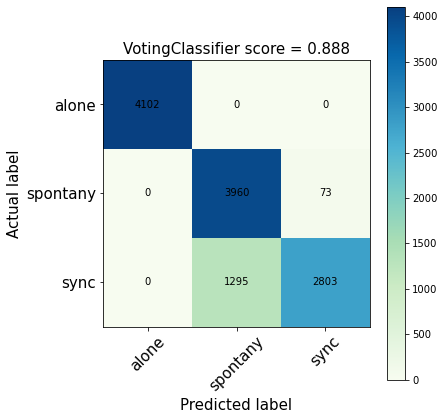

In [532]:
voting_clf = VotingClassifier(
 estimators=estimators,
 voting='soft')
model_val_score(voting_clf,x_train, x_test, y_train, y_test)

## Showing the use of PCA  for dimantinality reduction:

In [533]:
pca = PCA(n_components= 0.95)
pca.fit(x_train)
X_train_pca = pca.transform(x_train)
X_test_pca = pca.transform(x_test)

In [534]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [535]:
d

35

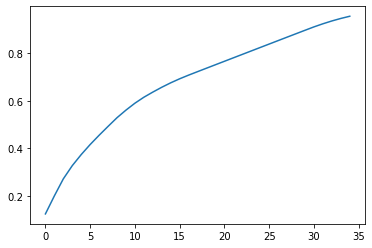

In [536]:
plt.plot(cumsum)

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


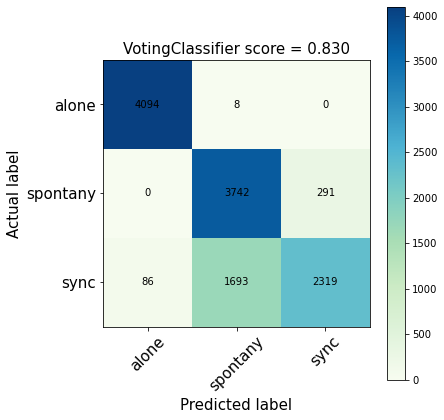

In [537]:
voting_clf = VotingClassifier(
 estimators=estimators,
 voting='soft')
model_val_score(voting_clf,X_train_pca, X_test_pca,y_train,y_test)

# I chose to use Votig classifier for testVal because i got the best reasult using this Classifier.

## Creating the final data train to predict the TestVal:

In [538]:
FinalTrainForVal = pd.concat([FinalTrain,FinalTest]).reset_index()
FinalTrainForVal.drop(['index'], axis = 1 , inplace = True)

In [539]:
FinalTrainForVal

,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,...,Velocity Z / Velocity Z_other,Pitch / Pitch_other,Roll / Roll_other,Yaw / Yaw_other,Wrist Pos X / Wrist Pos X_other,Wrist Pos Y / Wrist Pos Y_other,Wrist Pos Z / Wrist Pos Z_other,Elbow pos X / Elbow pos X_other,Elbow Pos Y / Elbow Pos Y_other,Elbow Pos Z / Elbow Pos Z_other
0,-102.28700,198.3166,-2.122641,-174.57210,379.146800,28.479910,1.423625,0.510471,1.481006,-164.0542,...,3.424785,2.173485,-3.900519,-2.628711,-0.857088,0.965855,-0.187871,-0.995907,-1.444040,0.072241
1,-103.87210,201.4944,-2.063620,-178.50250,357.854800,6.646493,1.429039,0.500107,1.486744,-165.7898,...,0.342505,2.188787,-3.712327,-2.651004,-0.868614,0.988300,-0.223563,-0.985386,-1.568060,0.046522
2,-106.36910,207.4667,-2.337110,-126.78780,318.528400,-12.872290,1.441357,0.489946,1.496526,-168.4939,...,-0.189040,2.259961,-3.633605,-2.698275,-0.884693,1.029272,-0.298159,-0.976370,-1.509135,-0.007158
3,-107.95090,212.1324,-2.788956,-74.28078,244.482300,-30.771300,1.444497,0.483316,1.499930,-170.1878,...,-0.601633,2.372113,-3.392236,-2.733068,-0.891958,1.055108,-0.343920,-0.976065,-1.503682,-0.057439
4,-109.54270,216.8003,-3.337280,-96.49666,269.543400,-37.723870,1.431969,0.488396,1.491886,-171.4205,...,-2.129775,2.516869,-2.956421,-2.693534,-0.890126,1.067353,-0.373697,-0.956172,-1.281933,-0.099819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102277,-97.79726,133.6108,35.390330,-42.69004,-1.874666,72.099560,0.765636,1.331985,0.870546,-144.3446,...,-2.069909,1.036477,-1.353148,-1.179286,-0.977610,1.324348,0.891222,-1.214749,6.394767,0.773184
102278,-99.02834,133.9962,37.420670,-92.09759,41.385200,153.315900,0.723243,1.339952,0.859011,-145.9045,...,-1.155001,1.014822,-1.379171,-1.185700,-0.992706,1.341751,0.939073,-1.239751,6.122630,0.784023
102279,-99.71982,133.3186,39.830990,-33.37087,13.548700,87.996030,0.704163,1.324794,0.858504,-146.7806,...,-0.619164,1.013495,-1.396933,-1.202016,-1.012069,1.330545,0.996992,-1.254146,4.770638,0.797191
102280,-100.04400,133.8906,40.176630,-51.18842,118.537600,2.515349,0.673300,1.358704,0.838863,-146.3582,...,-0.012958,0.985180,-1.453792,-1.193479,-1.025947,1.342441,1.055548,-1.231836,4.756890,0.838085


In [540]:
from sklearn.preprocessing import StandardScaler
x_train=FinalTrainForVal.drop(columns=['Status'])
y_train=FinalTrainForVal['Status']

In [541]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test_val = sc.transform(x_test_val)

In [542]:
estimators = [('xg', xgb_clf ),('rf',rf),('lg', log)]

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


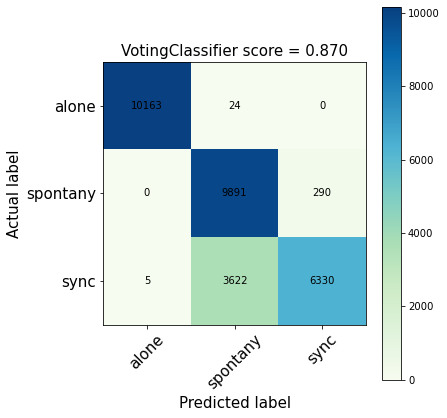

In [543]:
voting_clf = VotingClassifier(
 estimators=estimators,
 voting='soft')
model_val_score(voting_clf,x_train, x_test_val, y_train, y_test_val)

## Using PCA

In [544]:
pca = PCA(n_components= 0.95)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_val_pca = pca.transform(x_test_val)

In [547]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

35

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


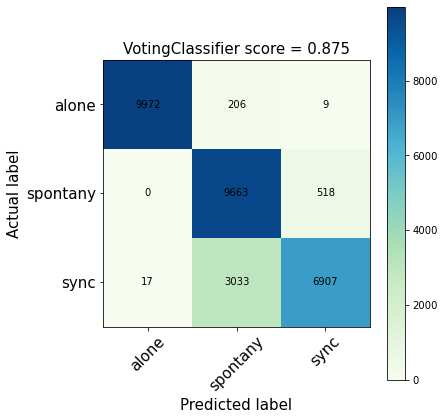

In [545]:
voting_clf = VotingClassifier(
 estimators=estimators,
 voting='soft')
model_val_score(voting_clf,x_train_pca,x_test_val_pca,y_train,y_test_val)

# Conclusions: we can see that the best reasult on the validationTest is 87.5% after PCA by using voting classifier